# Title: *Online Retail Dataset (E-commerce Transactions)*

- **Overview:-** This dataset contains transactional data from a UK-based online retail store. It records purchases made by customers across various countries, focusing mainly on wholesale orders.

- **Data Source:-** Originally published by the UCI Machine Learning Repository, collected from a real-world e-commerce platform.

- **Variables:-** Key fields include InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

- **Time Period:-** Transactions are recorded between December 2010 and December 2011.

- **Size:-** Approximately 541,909 rows and 8 columns.

- **Context:-** The dataset is useful for analyzing sales trends, customer purchasing behavior, inventory management, and building models for customer segmentation or sales forecasting.

- **Usage:-** Commonly used for projects involving data cleaning, exploratory data analysis (EDA), Feature Engineering & Model Performance.

# Task to be done:

## 1. [EDA (Exploratory Data Analysis).](#Task:1)
## 2. [Feature Engineering.](#Task:2)
## 3. [Model building.](#Task:3)
## 4. [Insights & Recommendations.](#Task:4)
**Dataset Summery / Dataset report.**

**Lets importing all necessity libraries and our data set for further process.**

In [1]:
# Step 1:- Importing all necessity libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import calendar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Step 2:- Exporing our CSV data:
E_Commerce_df = pd.read_csv("data.csv", encoding="ISO-8859-1", skipfooter=1, engine="python")

#Step 3:- Exploring our CSV data:
E_Commerce_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
#Step 4:- Checking out our dataset shape and size:
print("Shape of our E_Commerce dataset is:- ", E_Commerce_df.shape)
print("Size of our E_Commerce dataset is:- ", E_Commerce_df.size)

#Step 5:- Checking out our dataset Information & Description:
print("\nPrinting out our E_Commerce data set information:-" )
display(E_Commerce_df.info())

print("\nPrinting out our E_Commerce data set description:-" )
display(E_Commerce_df.describe(include= "all"))

Shape of our E_Commerce dataset is:-  (541908, 8)
Size of our E_Commerce dataset is:-  4335264

Printing out our E_Commerce data set information:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541908 entries, 0 to 541907
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541908 non-null  object 
 1   StockCode    541908 non-null  object 
 2   Description  540454 non-null  object 
 3   Quantity     541908 non-null  int64  
 4   InvoiceDate  541908 non-null  object 
 5   UnitPrice    541908 non-null  float64
 6   CustomerID   406828 non-null  float64
 7   Country      541908 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None


Printing out our E_Commerce data set description:-


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541908,541908,540454,541908.000000,541908,541908.000000,406828.000000,541908
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552262,NaN,4.611113,15287.696980,NaN
std,NaN,NaN,NaN,218.081359,NaN,96.759942,1713.597532,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [4]:
# It's a final check to see all the negative values in our numerical columns: 
print((E_Commerce_df.select_dtypes(include="number") < 0).any())

Quantity       True
UnitPrice      True
CustomerID    False
dtype: bool


**It's seems like thare are some negative values in 'Quantity' & 'UnitPrice' columns let's see why there are some negative values.**

In [5]:
# let see few records from 'UnitPrice' & 'Quantity' column that why it contain negative values:
pd.concat([E_Commerce_df[E_Commerce_df["UnitPrice"] < 0],
           E_Commerce_df[E_Commerce_df["Quantity"] < 0]]
).drop_duplicates().head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom


In [6]:
# Let see how much unique values are there and the starting characters in our 'InvoiceNo' column: 
print("Printing out the total number of unique values in 'InvoiceNo' column:- ",
      E_Commerce_df["InvoiceNo"].nunique())

E_Commerce_df_char_InvoiceNo_start = E_Commerce_df["InvoiceNo"].str[0]
print("Printing out all the starting characters in 'InvoiceNo' column:- ",
      E_Commerce_df_char_InvoiceNo_start.unique())

Printing out the total number of unique values in 'InvoiceNo' column:-  25900
Printing out all the starting characters in 'InvoiceNo' column:-  ['5' 'C' 'A']


**Its clear that all those negative values are pleaced with some reason in 'Quantity' & 'UnitPrice'which is directly linked with 'InvoiceNo' as it conatin 'C' & 'A'.**
- Where **'C'** refers to **Cancelled**.
- Where **'A'** refers to **Adjustment**.

**This is consider by me side.**  \
**Before doing EDA let's remove all those negative values.**

In [7]:
# Removing all negative values from 'Quantity' & 'CustomerID' feature:
E_Commerce_df_new = E_Commerce_df[(E_Commerce_df["Quantity"] >= 0) & (
    E_Commerce_df["UnitPrice"] >= 0)]
E_Commerce_df_new.loc[E_Commerce_df_new["CustomerID"] < 0, "CustomerID"] = 0

print("Shape of our dataset before droping all the negative values:- ", E_Commerce_df.shape)
print("Shape of our dataset after droping all the negative values:- ", E_Commerce_df_new.shape)
print("It's a final check to see all the negative values in our data set:- ")
display((E_Commerce_df_new.select_dtypes(include="number") < 0).any())
print("printing out few lines of our E_Commerce data set:- ")
display(E_Commerce_df_new.head(5))

Shape of our dataset before droping all the negative values:-  (541908, 8)
Shape of our dataset after droping all the negative values:-  (531282, 8)
It's a final check to see all the negative values in our data set:- 


Quantity      False
UnitPrice     False
CustomerID    False
dtype: bool

printing out few lines of our E_Commerce data set:- 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Before doing *EDA* Importing and Checking our data set like our dataset contains 5,41,908 rows, 8 columns & size of our dataset is 4,335,264.**

**There are some negative values in "Quantity" & "UnitPrice" columns which was now handled.**

<a id="Task:1"></a>
#  💠 1. EDA (Exploratory Data Analysis):

- **1: [Checking for Missing & handling missing Values:](#Step:1)**
- **2: [Checking for Duplicates & handling duplicates values:](#Step:2)**
- **3: [Data Types & Conversions (If needed):](#Step:3)**
- **4: [Univariate Analysis:](#Step:4)**
- **5: [Bivariate Analysis:](#Step:5)**
- **6: [Multivariate Analysis:](#Step:6)**
- **7: [Categorical Feature Analysis:](#Step:7)**
- **8: [Outlier Detection:](#Step:8)**
- **9: [Correlation:](#Step:9)**

<a id="Step:1"></a>

## Task 1:- 
**Checking for Missing & handling missing Values:**

In [8]:
#Step 1:- Checking out total numbers of Nan values in our dataset:
display("Printing out all the nan values in our dataset: ",E_Commerce_df_new.isnull())

'Printing out all the nan values in our dataset: '

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541903,False,False,False,False,False,False,False,False
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False


In [9]:
#Step 2:- Calculating total numbers of Nan values in our dataset:
print("Printing out total nob of nan value in every columns \n",
      E_Commerce_df_new.isnull().sum(),"\n")
print("Printing out total nob of nan value in percentage  \n",
      (E_Commerce_df_new.isnull().mean()*100).round(2))

Printing out total nob of nan value in every columns 
 InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64 

Printing out total nob of nan value in percentage  
 InvoiceNo       0.00
StockCode       0.00
Description     0.11
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.10
Country         0.00
dtype: float64


**Its show's that there was 24.93% of null value present in our 'CustomerID' column and 0.27% in 'Description' column. So for Description nan vallue will be replaced with most occurred value and for CustomerID it will be replaced with -1.**

In [10]:
#Step 3:- Checking total number of unique & maximun time occure value in 'Description' column:

print("Total numbers of unique values in 'Description' column is:- ",
      E_Commerce_df_new["Description"].nunique())

print("Checking the maximum time occure value in 'Description' column:- ",
      E_Commerce_df_new["Description"].mode()[0])

print("Before replaceing the nan value with mode value let's check the type of it:- \n",
      type(E_Commerce_df_new["Description"].mode()))

Total numbers of unique values in 'Description' column is:-  4077
Checking the maximum time occure value in 'Description' column:-  WHITE HANGING HEART T-LIGHT HOLDER
Before replaceing the nan value with mode value let's check the type of it:- 
 <class 'pandas.core.series.Series'>


In [11]:
# Checking total number of unique & maximun time occure value in 'CustomerID' column:
print("Total numbers of unique values in 'CustomerID' column is:- ",
      E_Commerce_df_new["CustomerID"].nunique())

print("Checking the maximum time occure value in 'CustomerID' column:- ")
display(E_Commerce_df_new["CustomerID"].value_counts())

Total numbers of unique values in 'CustomerID' column is:-  4339
Checking the maximum time occure value in 'CustomerID' column:- 


CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: count, Length: 4339, dtype: int64

In [12]:
# It's a final check to see the 0 is there in our 'CustomerID' column or not: 
0 in E_Commerce_df_new["CustomerID"].values

False

In [13]:
#Step 4:- Now replacing the nan value of 'Description' with mode value & 'CustomerID' with 0:
E_Commerce_df_new["Description"].fillna(E_Commerce_df_new["Description"].mode()[0],inplace=True)
print("All nan values from 'Description' column is now successfully removed.", )

E_Commerce_df_new["CustomerID"].fillna(0,inplace=True)
print("All nan values from 'CustomerID' column is now successfully removed.")

#Step 5:- Checking it final time that the nan value is filled or not:
print("\nIt's a final check if any nan value is there in this dateset:- \n",
      E_Commerce_df_new.isnull().sum(),"\n")

All nan values from 'Description' column is now successfully removed.
All nan values from 'CustomerID' column is now successfully removed.

It's a final check if any nan value is there in this dateset:- 
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64 



**In our data set there are total two columns which contains nul values 'Description' with 1,454 values of 0.27% and 'CustomerID' with 1,35,080 values of 24.93% which was now handled.**

<a id="Step:2"></a>

## Task 2:- 
**Checking for Duplicates & handling duplicates values:**

In [14]:
#Step 1:- Finding out the total nob of duplicates data: 
print("Total nob of duplicated data in our dataset is: ",
      E_Commerce_df_new.duplicated().sum())

#Step 2:- Finding/view the duplicate record:
display(E_Commerce_df_new[E_Commerce_df_new.duplicated() == True].head(5))

Total nob of duplicated data in our dataset is:  5231


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [15]:
#Step 3:- Checking out the shape of our dataset defore droping all the duplicates data:
print("Shape of our dataset before droping duplicated data: ",
      E_Commerce_df_new.shape)

#Step 4:- Droping all the duplicates records from our dataset:
E_Commerce_df_new.drop_duplicates(inplace=True)

#Checking out the shape of our dataset after droping all the duplicates data:
print("Shape of our dataset after droping duplicated data: ",
      E_Commerce_df_new.shape)

#Step 5:- Checking it final time that the duplicated value is removed or not:
print("\nIt's a final check if any duplicated value is there in this dateset: ",
      E_Commerce_df_new.duplicated().sum())

# Viewing a few duplicate record from index 535 to 541:
print("Printing out the data from index 535 to 541 to check if duplicat value is removed or not:")
E_Commerce_df_new.loc[535:541]

Shape of our dataset before droping duplicated data:  (531282, 8)
Shape of our dataset after droping duplicated data:  (526051, 8)

It's a final check if any duplicated value is there in this dateset:  0
Printing out the data from index 535 to 541 to check if duplicat value is removed or not:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
535,536409,20717,STRAWBERRY SHOPPER BAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
536,536409,20723,STRAWBERRY CHARLOTTE BAG,1,12/1/2010 11:45,0.85,17908.0,United Kingdom
538,536409,21980,PACK OF 12 RED RETROSPOT TISSUES,12,12/1/2010 11:45,0.29,17908.0,United Kingdom
540,536409,22112,CHOCOLATE HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
541,536412,20728,LUNCH BAG CARS BLUE,3,12/1/2010 11:49,1.65,17920.0,United Kingdom


**In our data set there are total 5268 duplicate record and before we remove all the duplicate record shape of our dataset is (541908, 8) and now after removing all the duplicate record it was (536640, 8).**

<a id="Step:3"></a>

## Task 3:- 
**Data Types & Conversions (If needed):**

In [16]:
#Step 1:- Here we check the data type of every columns in our dataset:
print("Data type of our columns are:- \n",
      E_Commerce_df_new.dtypes)

display(E_Commerce_df_new.head(5))

Data type of our columns are:- 
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**As we see that there are two columns in our dataset which are not in the correct data type so we have to change it:**
- 'InvoiceDate' from object to date time.
- 'CustomerID' from float64 to integer.

**'InvoiceNo' column datatype remains same as it contains some characters in starting.**

In [17]:
#Step 2:- Changing the data type from of InvoiceDate and CustomerID colums:

E_Commerce_df_new["InvoiceDate"] = pd.to_datetime(E_Commerce_df_new["InvoiceDate"])
E_Commerce_df_new["CustomerID"] = E_Commerce_df_new["CustomerID"].astype(int)

print("""Successfully converted 'InvoiceDate' datetype from object to date time.
Successfully converted 'CustomerID' datetype from  float64 to integer.""")

Successfully converted 'InvoiceDate' datetype from object to date time.
Successfully converted 'CustomerID' datetype from  float64 to integer.


In [18]:
print("It's a final check that datetype of our columns are now in perfect format or not: \n",
      E_Commerce_df_new.dtypes)

print("After converting every coluns into corect datetype lets see how it looks: \n")
display(E_Commerce_df_new.head(5))

It's a final check that datetype of our columns are now in perfect format or not: 
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object
After converting every coluns into corect datetype lets see how it looks: 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


**In our data set there are total two columns which contains wrong datatype 'InvoiceDate' and 'CustomerID' which was now set to correct order let's proceed further to explore our data.**

<a id="Step:4"></a>

## Task 4:- 
**Univariate Analysis:**

## Let's start with numeric columns to perform Univariate Analysis:

In [19]:
# Analysing the targeted numerical column for univarriate analysis:

print("Total nob of unique value in 'UnitPrice' columns: ",
      E_Commerce_df_new["UnitPrice"].nunique(),"\n")

print("Toatl every nob of unique values in 'UnitPrice' columns : ",
      E_Commerce_df_new["UnitPrice"].value_counts(),"\n")

Total nob of unique value in 'UnitPrice' columns:  1292 

Toatl every nob of unique values in 'UnitPrice' columns :  UnitPrice
1.25       49011
1.65       36944
0.85       27748
2.95       26692
0.42       24046
           ...  
156.45         1
28.66          1
46.86          1
84.21          1
1714.17        1
Name: count, Length: 1292, dtype: int64 



In [20]:
# Calculate AVG, MIN & MAX price:
AVG_price = E_Commerce_df_new["UnitPrice"].mean()
MAX_price = E_Commerce_df_new["UnitPrice"].max()
MIN_price = E_Commerce_df_new["UnitPrice"].min()

print(f"AVG Unit Price is:- {AVG_price:.2f}")
print(f"Maximum Unit Price is:- {MAX_price:.2f}")
print(f"Minimum Unit Price is:- {MIN_price:.2f}")

AVG Unit Price is:- 3.91
Maximum Unit Price is:- 13541.33
Minimum Unit Price is:- 0.00


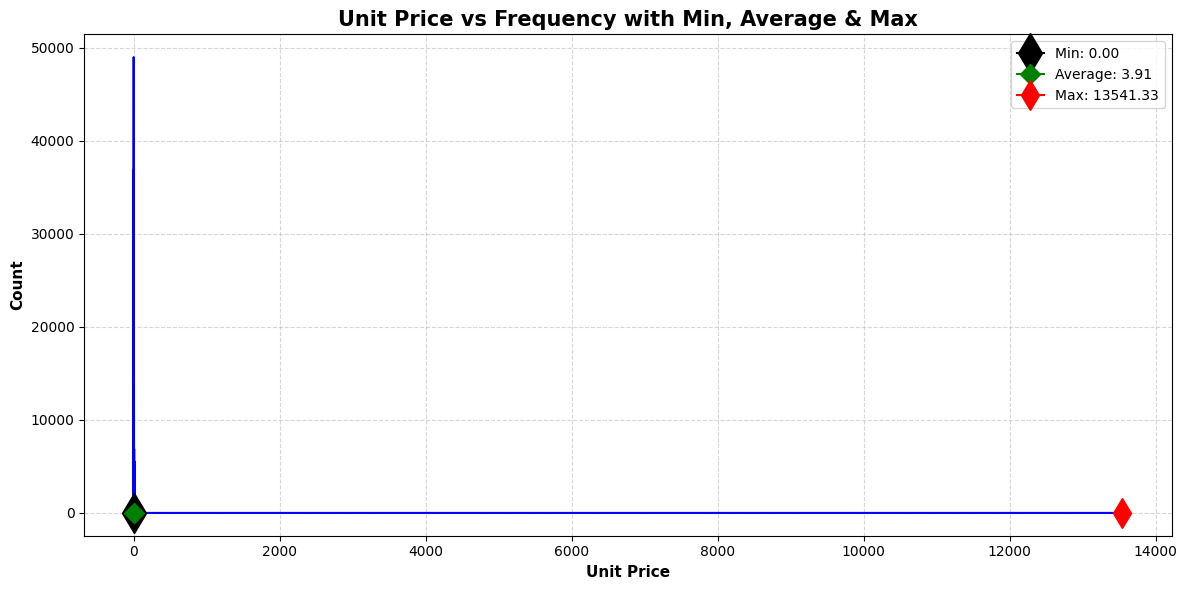

In [21]:
price_counts = E_Commerce_df_new["UnitPrice"].value_counts().sort_index()

# Line plot for unit price with min, average and max values:
plt.figure(figsize=(12, 6))
sns.lineplot(x=price_counts.index, y=price_counts.values, color="blue")

# Mark marker at min, average, max and for negative values:
plt.plot(MIN_price, 0, marker="d", color="black", markersize=20, label=f"Min: {MIN_price:.2f}")
plt.plot(AVG_price, 0, marker="D", color="green", markersize=10, label=f"Average: {AVG_price:.2f}")
plt.plot(MAX_price, 0, marker="d", color="red", markersize=15, label=f"Max: {MAX_price:.2f}")

# Adding title, lable to our plot:
plt.title("Unit Price vs Frequency with Min, Average & Max", fontsize=15, fontweight="bold")
plt.xlabel("Unit Price", fontsize=11, fontweight="bold")
plt.ylabel("Count", fontsize=11, fontweight="bold")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

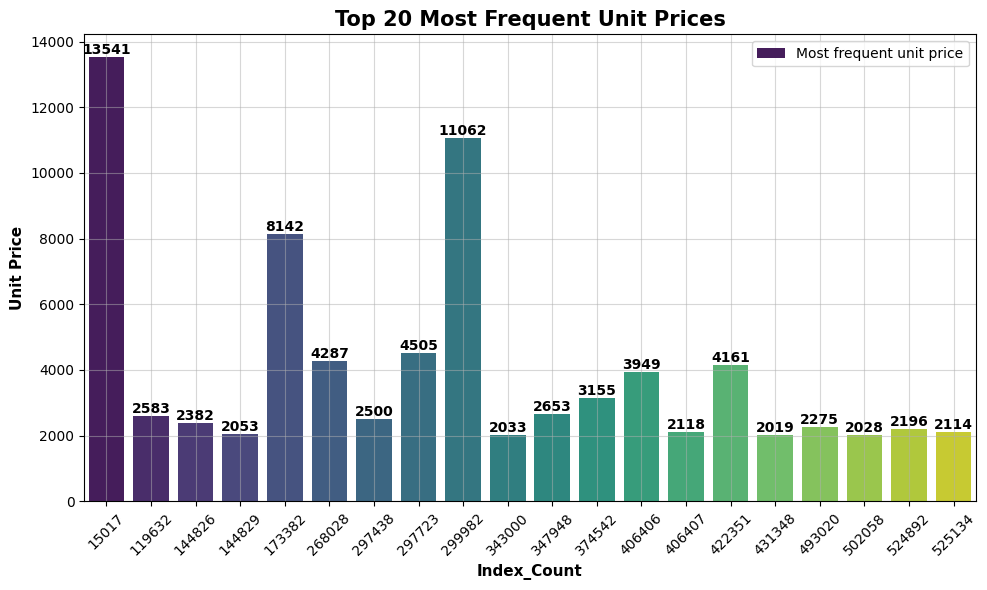

In [22]:
# Top 20 unit price:
top_prices = E_Commerce_df_new['UnitPrice'].sort_values(
    ascending=False).drop_duplicates().head(20)

# Bar plot for most frequent unit price:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_prices.index, y=top_prices.values, palette="viridis",
                      label="Most frequent unit price")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 Most Frequent Unit Prices", fontsize=15, fontweight="bold")
plt.xlabel("Index_Count", fontsize=11, fontweight="bold")
plt.ylabel("Unit Price", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Let's start with Categorical Columns to perform Univariate Analysis:

**Analysing "StockCode" column for univarriate analysis.**

In [23]:
# Analysing the targeted Categorical column for univarriate analysis:

print("Total nob of unique value in 'StockCode' columns: ",
      E_Commerce_df_new["StockCode"].nunique(),"\n")

print("Toatl every nob of unique values in 'StockCode' columns : ",
      E_Commerce_df_new["StockCode"].value_counts(),"\n")

# Top 20 most frequent StockCodes only:
top_stockcodes = E_Commerce_df_new["StockCode"].value_counts().head(20).reset_index()

Total nob of unique value in 'StockCode' columns:  3941 

Toatl every nob of unique values in 'StockCode' columns :  StockCode
85123A    2258
85099B    2112
22423     2009
47566     1700
20725     1582
          ... 
90152C       1
84596g       1
82615        1
21414        1
23843        1
Name: count, Length: 3941, dtype: int64 



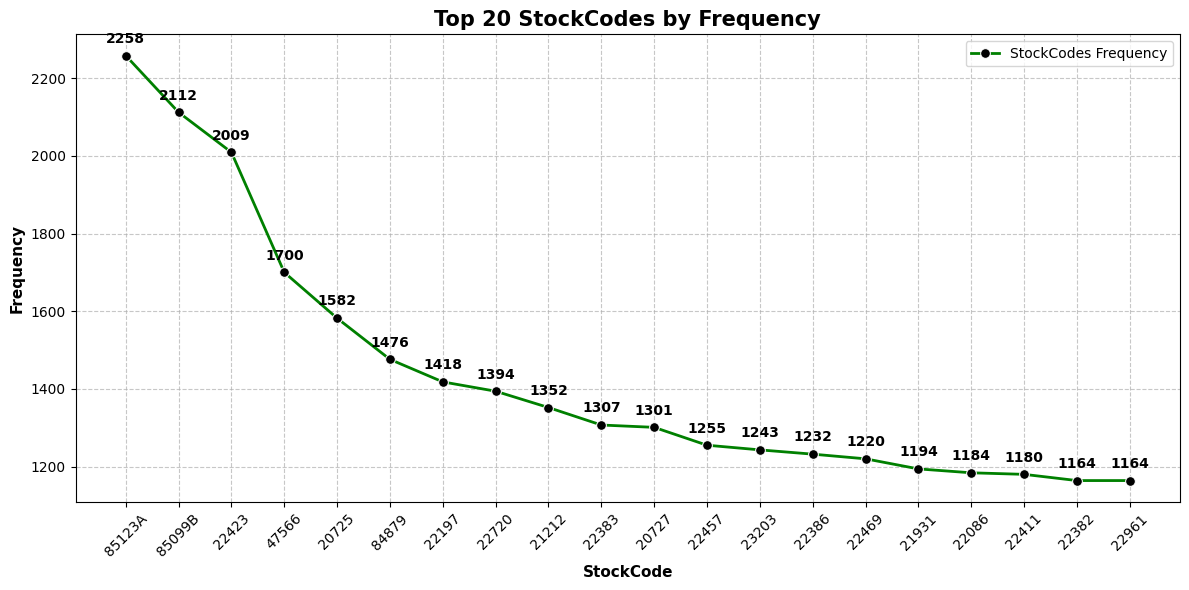

In [24]:
# Line plot of top 20 stockcodes:
plt.figure(figsize=(12, 6))
Line_plot = sns.lineplot(x=top_stockcodes["StockCode"], y=top_stockcodes["count"], color="green",
                         marker="o",markerfacecolor="black", markersize=7,
                         linewidth=2, label="StockCodes Frequency")

# Annotate each marker with value:
for x, y in zip(top_stockcodes["StockCode"], top_stockcodes["count"]):
    Line_plot.text(x, y+25,str(y), ha="center", va="bottom", fontsize=10,
                   fontweight="bold", color="black")

# Adding title, lable to our plot:
plt.title("Top 20 StockCodes by Frequency", fontsize=15, fontweight="bold")
plt.xlabel("StockCode", fontsize=11, fontweight="bold")
plt.ylabel("Frequency", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

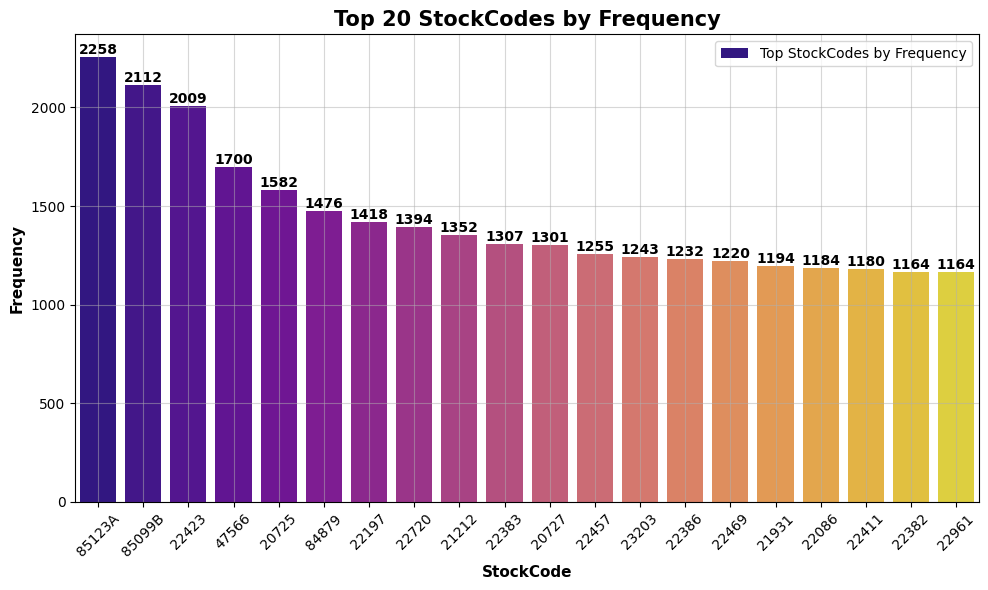

In [25]:
# Bar plot of top 20 stockcodes:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_stockcodes["StockCode"], y=top_stockcodes["count"],
                       palette="plasma",label="Top StockCodes by Frequency")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:
plt.title("Top 20 StockCodes by Frequency", fontsize=15, fontweight="bold")
plt.xlabel("StockCode", fontsize=11, fontweight="bold")
plt.ylabel("Frequency", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Analysing "Country" column for univarriate analysis.**

In [26]:
#Analysing Country column for univarriate analysis:

print("Total nob of unique value in 'Country' columns: ",
      E_Commerce_df_new["Country"].nunique(),"\n")

print("Toatl every nob of unique values in 'Country' columns : ",
      E_Commerce_df_new["Country"].value_counts(),"\n")

# Top 20 most frequent StockCodes only:
top_Country = E_Commerce_df_new["Country"].value_counts().head(20).reset_index()

Total nob of unique value in 'Country' columns:  38 

Toatl every nob of unique values in 'Country' columns :  Country
United Kingdom          481141
Germany                   9027
France                    8392
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta        

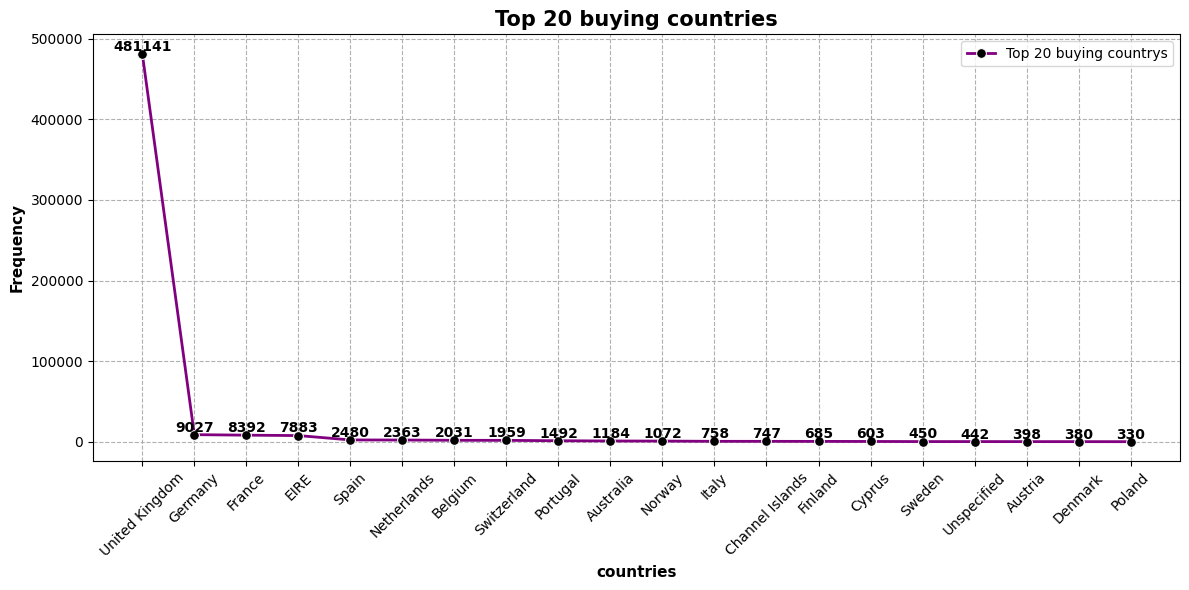

In [27]:
# Line plot of top 20 buying countries:
plt.figure(figsize=(12, 6))
Line_plot = sns.lineplot(x=top_Country["Country"], y=top_Country["count"], color="purple",
                         marker="o",markerfacecolor="black", markersize=7,
                         linewidth=2, label="Top 20 buying countrys")

# Annotate each marker with value:
for x, y in zip(top_Country["Country"], top_Country["count"]):
    Line_plot.text(x, y+100, str(y), ha="center", va="bottom", fontsize=10,
                   fontweight="bold", color="black")

# Adding title, lable to our plot:
plt.title("Top 20 buying countries", fontsize=15, fontweight="bold")
plt.xlabel("countries", fontsize=11, fontweight="bold")
plt.ylabel("Frequency", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='--', alpha=1)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [28]:
# Calculating top country with the fist one:
top_Country_without_1st = (E_Commerce_df_new["Country"].value_counts()
                           .head(21).reset_index().iloc[1:].reset_index(drop=True))

top_Country_without_1st.columns = ["Country", "count"]
display(top_Country_without_1st)

,Country,count
0,Germany,9027
1,France,8392
2,EIRE,7883
3,Spain,2480
4,Netherlands,2363
5,Belgium,2031
6,Switzerland,1959
7,Portugal,1492
8,Australia,1184
9,Norway,1072


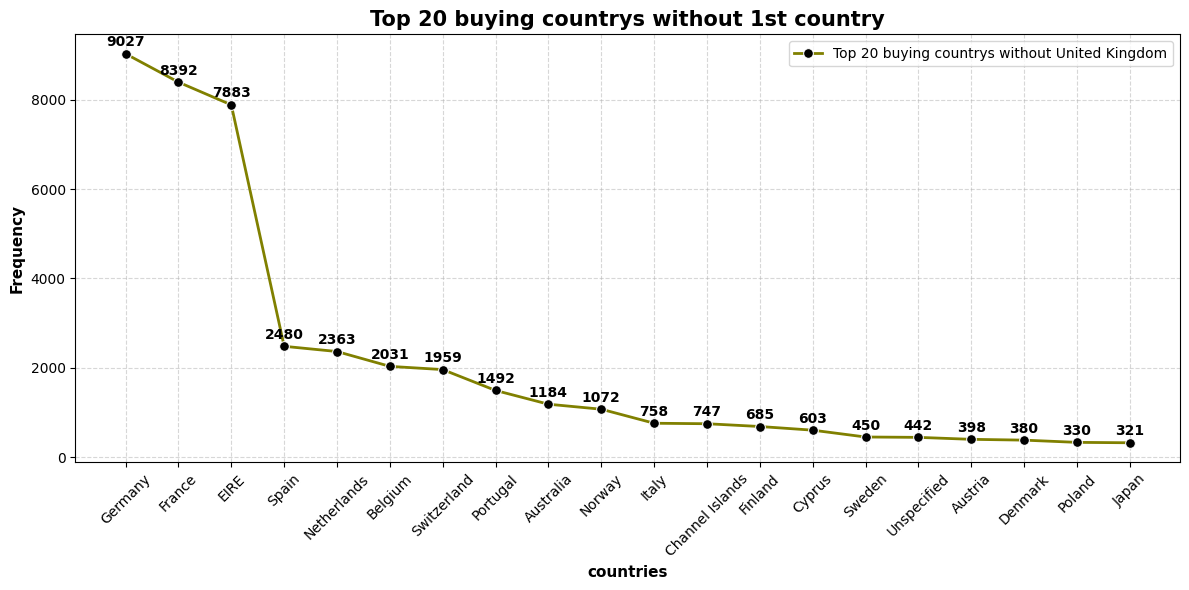

In [29]:
# Line plot of top 20 buying countries without 1st country:
plt.figure(figsize=(12, 6))
Line_plot = sns.lineplot(x=top_Country_without_1st["Country"], y=top_Country_without_1st["count"],
             color="olive", marker="o",markerfacecolor="black", markersize=7, linewidth=2,
             label="Top 20 buying countrys without United Kingdom")

# Annotate each marker with value:
for x, y in zip(top_Country_without_1st["Country"], top_Country_without_1st["count"]):
    Line_plot.text(x, y+100, str(y), ha="center", va="bottom", fontsize=10,
                   fontweight="bold", color="black")

# Adding title, lable to our plot:
plt.title("Top 20 buying countrys without 1st country", fontsize=15, fontweight="bold")
plt.xlabel("countries", fontsize=11, fontweight="bold")
plt.ylabel("Frequency", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

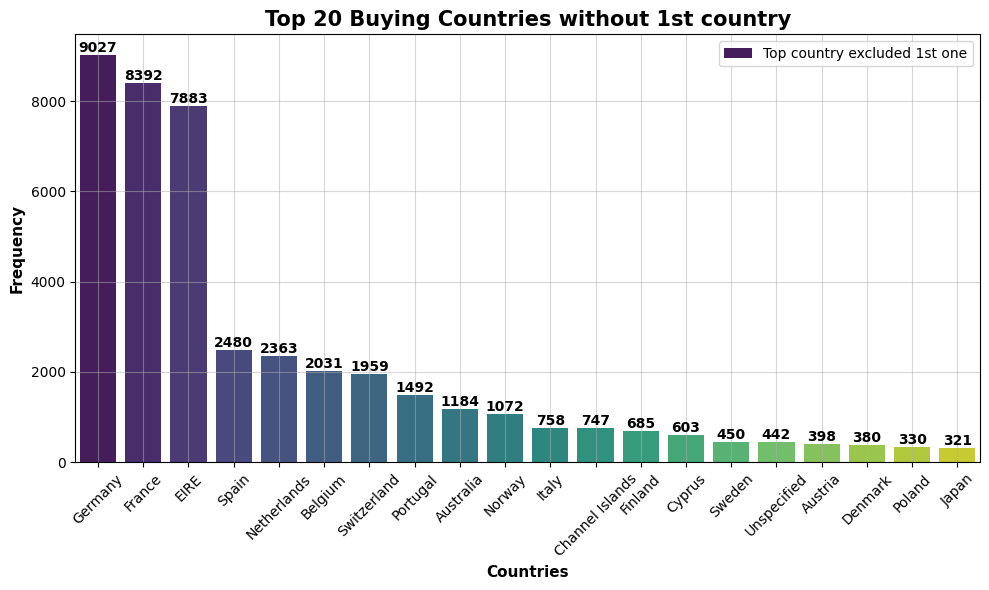

In [30]:
# Bar plot of top 20 buying countries without 1st country:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_Country_without_1st["Country"], 
                 y=top_Country_without_1st["count"], palette="viridis",
                      label="Top country excluded 1st one")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 Buying Countries without 1st country", fontsize=15, fontweight="bold")
plt.xlabel("Countries", fontsize=11, fontweight="bold")
plt.ylabel("Frequency", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**During Univariate Analysis we have Analysis "UnitPrice", "StockCode" & "Country" columns and plot few line and bars plot to see detils.**

<a id="Step:5"></a>

## Step 5:- 
**Bivariate Analysis (Two variable):**

## Let's start with numeric vs numeric columns to perform Bivariate Analysis:

In [31]:
# Which unit price sold the most quantity:
top_prices = (E_Commerce_df_new.groupby("UnitPrice")
    .agg(Total_Quantity=("Quantity", "sum"))
    .reset_index().sort_values(by="Total_Quantity", ascending=False)).head(20)

print("Top Unit Prices by Sold Quantity:")
display(top_prices.head(5))

Top Unit Prices by Sold Quantity:


,UnitPrice,Total_Quantity
84,1.25,503953
32,0.42,484737
105,1.65,375453
59,0.85,308839
95,1.45,237187


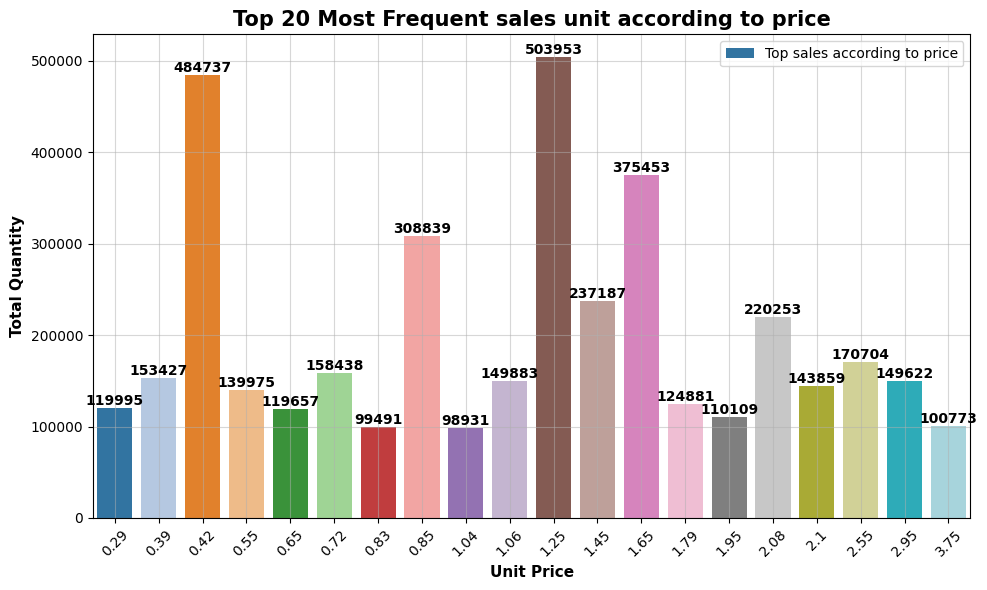

In [32]:
# Bar plot of top 20 Most Frequent sales unit according to price:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_prices.UnitPrice, y=top_prices.Total_Quantity, palette='tab20',
                      label="Top sales according to price")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:
plt.title("Top 20 Most Frequent sales unit according to price", fontsize=15, fontweight="bold")
plt.xlabel("Unit Price", fontsize=11, fontweight="bold")
plt.ylabel("Total Quantity", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Which quantity values had the highest unit price:
top_quantity = (E_Commerce_df_new.groupby("Quantity")
    .agg(Max_UnitPrice=("UnitPrice", "max"),Avg_UnitPrice=("UnitPrice", "mean"))
    .reset_index().sort_values(by="Max_UnitPrice", ascending=False)).head(20)

# Round Avg_UnitPrice separately
top_quantity["Avg_UnitPrice"] = top_quantity["Avg_UnitPrice"].round(2)

print("Quantities with Highest Unit Prices:")
display(top_quantity.head(5))

Quantities with Highest Unit Prices:


,Quantity,Max_UnitPrice,Avg_UnitPrice
0,1,13541.33,6.89
59,60,649.50,2.77
1,2,275.60,4.34
2,3,145.00,3.48
3,4,110.00,3.71


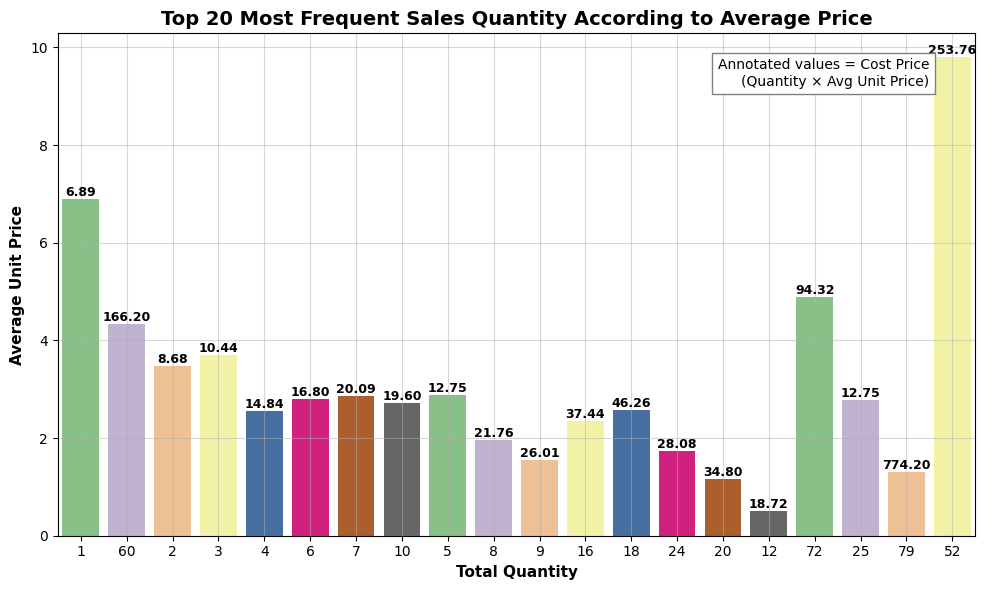

In [34]:
# Bar plot of top 20 Most Frequent sales quantity according to max Unit price:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_quantity.Quantity, y=top_quantity.Avg_UnitPrice, palette='Accent')

# Annotate each marker with value:
for p, q, avg in zip(Bar_plot.patches, top_quantity.Quantity, top_quantity.Avg_UnitPrice):
    Cost_Price = q * avg
    Bar_plot.annotate(f'{Cost_Price:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=9, fontweight="bold")
    
# Adding exact values of xticks:
plt.xticks(ticks=range(len(top_quantity["Quantity"])), labels=top_quantity["Quantity"])

# Adding annotations lable inside the plot:
plt.text(0.95, 0.95, "Annotated values = Cost Price\n(Quantity × Avg Unit Price)", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, color="black", bbox=dict(facecolor="white", alpha=1, edgecolor="gray"))

# Adding title, lable to our plot:
plt.title("Top 20 Most Frequent Sales Quantity According to Average Price",
          fontsize=14, fontweight="bold")
plt.xlabel("Total Quantity", fontsize=11, fontweight="bold")
plt.ylabel("Average Unit Price", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Let's start with numeric vs categorical columns to perform Bivariate Analysis 

In [35]:
# Country with the highest quantity ordered:
top_country_quantity = (E_Commerce_df_new.groupby("Country")
    .agg(Total_Quantity=("Quantity", "sum"))
    .reset_index().sort_values(by="Total_Quantity", ascending=False)).head(20)

print("Top Country with Highest Quantity Ordered:")
display(top_country_quantity.head(5))

Top Country with Highest Quantity Ordered:


,Country,Total_Quantity
36,United Kingdom,4718327
24,Netherlands,200937
10,EIRE,147281
14,Germany,119156
13,France,112058


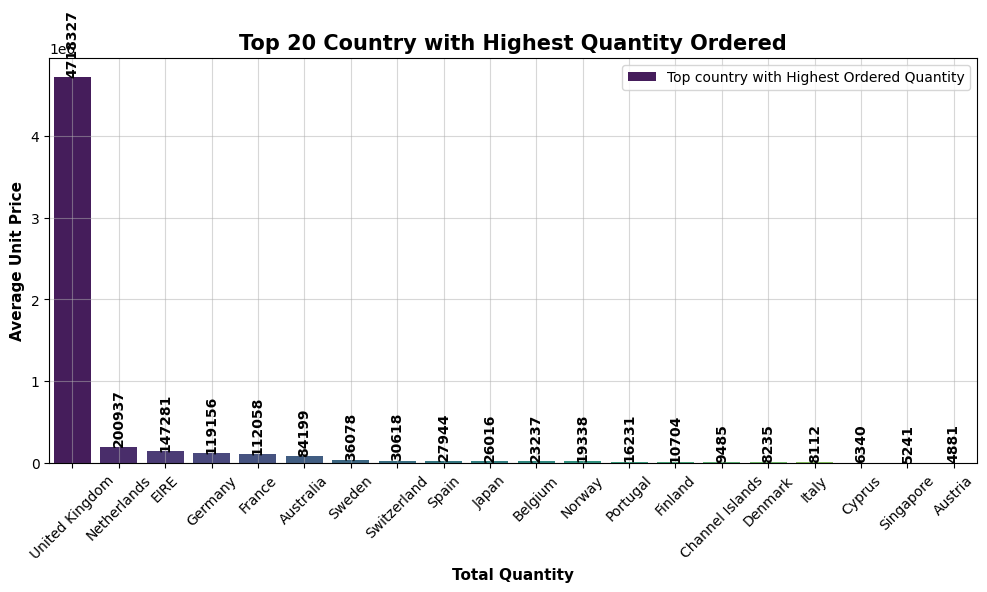

In [36]:
# Bar plot of top 20 Most Country with orders:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_country_quantity.Country, y=top_country_quantity.Total_Quantity,
                       palette="viridis", label="Top country with Highest Ordered Quantity")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=90)

# Adding title, lable to our plot:    
plt.title("Top 20 Country with Highest Quantity Ordered", fontsize=15, fontweight='bold')
plt.xlabel("Total Quantity", fontsize=11, fontweight="bold")
plt.ylabel("Average Unit Price", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Save the top countries excluding the 1st one:
top_country_quantity_excluded = top_country_quantity.iloc[1:]

print("Saved result by excluding the 1st country:")
display(top_country_quantity_excluded.head(5))

Saved result by excluding the 1st country:


,Country,Total_Quantity
24,Netherlands,200937
10,EIRE,147281
14,Germany,119156
13,France,112058
0,Australia,84199


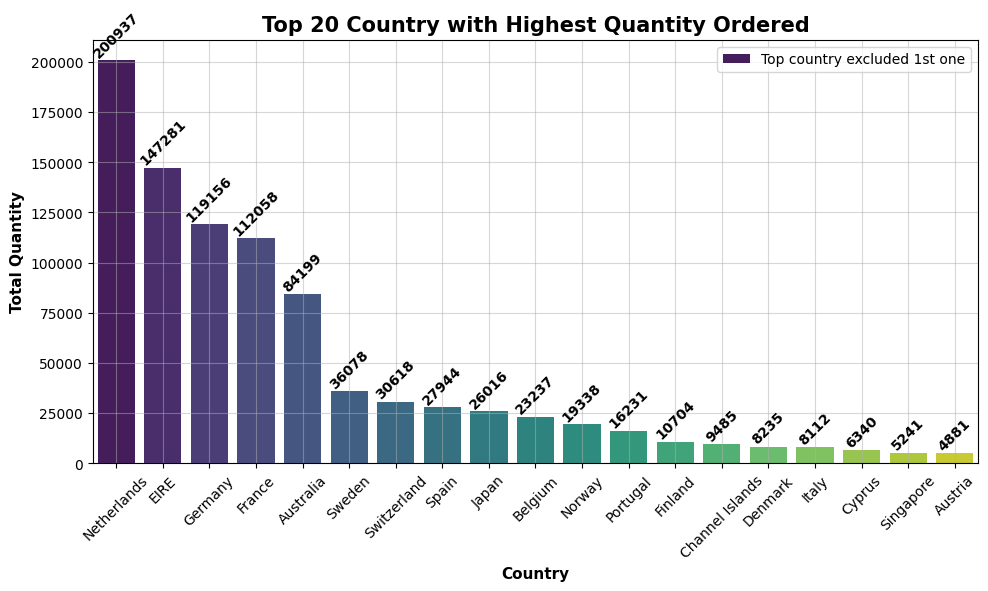

In [38]:
# Bar plot of top 20 Most Country with orders:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_country_quantity_excluded.Country, 
                       y=top_country_quantity_excluded.Total_Quantity, palette='viridis',
                      label="Top country excluded 1st one")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold", rotation=45)

# Adding title, lable to our plot:    
plt.title("Top 20 Country with Highest Quantity Ordered", fontsize=15, fontweight="bold")
plt.xlabel("Country", fontsize=11, fontweight="bold")
plt.ylabel("Total Quantity", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

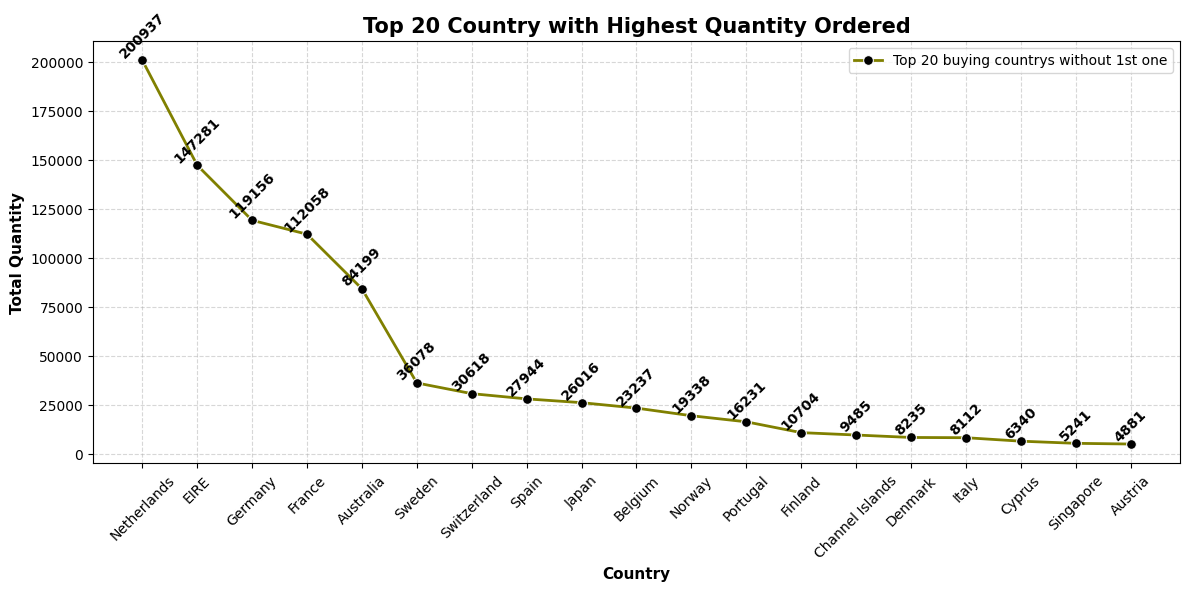

In [39]:
# Line plot of top 20 buying countries without 1st country:
plt.figure(figsize=(12, 6))
Line_plot = sns.lineplot(x=top_country_quantity_excluded["Country"], 
                         y=top_country_quantity_excluded["Total_Quantity"],
             color="olive", marker='o',markerfacecolor="black", markersize=7, linewidth=2,
             label="Top 20 buying countrys without 1st one")

# Annotate each marker with value:
for x, y in zip(top_country_quantity_excluded["Country"],
                top_country_quantity_excluded["Total_Quantity"]):
    Line_plot.text(x, y+100, str(y), ha="center", va="bottom", fontsize=10,
                   fontweight="bold", color="black", rotation=45)

# Adding title, lable to our plot:
plt.title("Top 20 Country with Highest Quantity Ordered", fontsize=15, fontweight="bold")
plt.xlabel("Country", fontsize=11, fontweight="bold")
plt.ylabel("Total Quantity", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Let's start with categorical vs categorical columns to perform Bivariate Analysis 

In [40]:
# Group by Country and InvoiceDate by most orders according to date:
country_orders = (E_Commerce_df_new.groupby("Country")
    .agg(Total_Orders=("InvoiceNo", "nunique"))
    .reset_index().sort_values(by="Total_Orders", ascending=False)).head(20)

print("Countries with Most Orders:")
display(country_orders.head(5))

Countries with Most Orders:


,Country,Total_Orders
36,United Kingdom,18784
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98


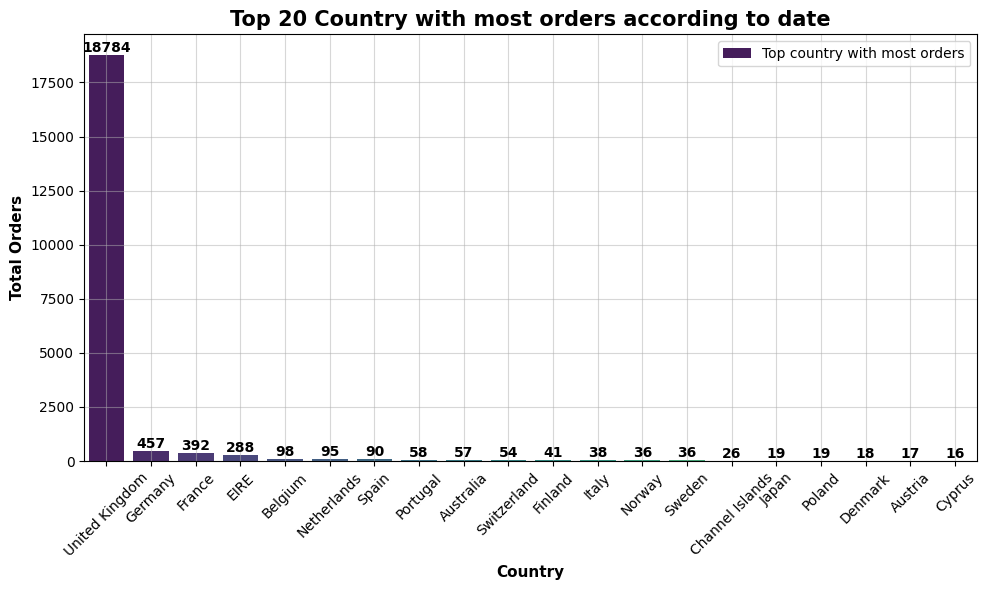

In [41]:
# Bar plot to show top 20 Country with most orders according to date:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=country_orders.Country, 
                       y=country_orders.Total_Orders, palette="viridis",
                      label="Top country with most orders")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 Country with most orders according to date", fontsize=15, fontweight="bold")
plt.xlabel("Country", fontsize=11, fontweight="bold")
plt.ylabel("Total Orders", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# Save the values with excluding the 1st one:
top_order_country_excluded = country_orders.iloc[1:]

print("Saved result by excluding the 1st country:")
display(top_order_country_excluded.head(5))

Saved result by excluding the 1st country:


,Country,Total_Orders
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98
24,Netherlands,95


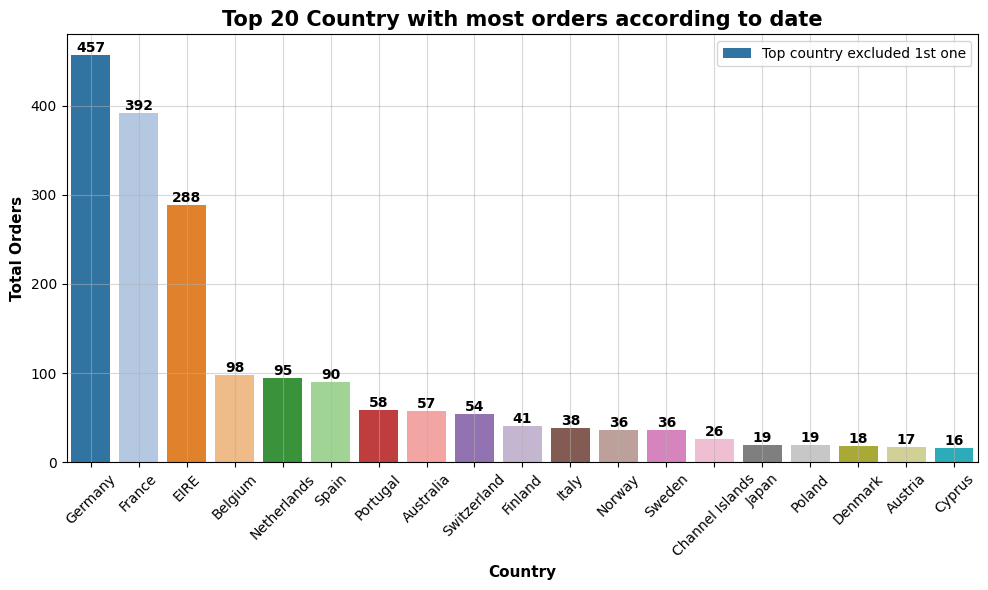

In [43]:
# Bar plot to show top 20 Country with most orders according to date:
plt.figure(figsize=(10, 6))
Bar_plot = sns.barplot(x=top_order_country_excluded.Country, 
                       y=top_order_country_excluded.Total_Orders, palette="tab20",
                       label="Top country excluded 1st one")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 Country with most orders according to date", fontsize=15, fontweight="bold")
plt.xlabel("Country", fontsize=11, fontweight="bold")
plt.ylabel("Total Orders", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

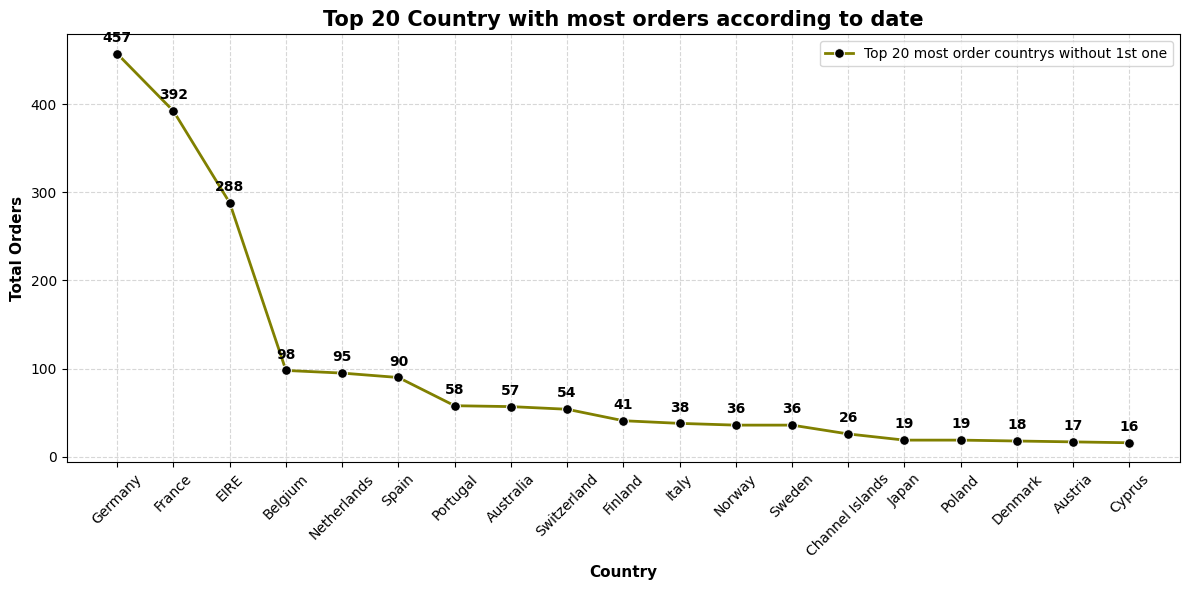

In [44]:
# Line plot of top 20 buying countries without 1st country:
plt.figure(figsize=(12, 6))
Line_plot = sns.lineplot(x=top_order_country_excluded["Country"], 
                         y=top_order_country_excluded["Total_Orders"],
             color="olive", marker='o',markerfacecolor="black", markersize=7, linewidth=2,
             label="Top 20 most order countrys without 1st one")

# Annotate each marker with value:
for x, y in zip(top_order_country_excluded["Country"],
                top_order_country_excluded["Total_Orders"]):
    Line_plot.text(x, y+10, str(y), ha="center", va="bottom", fontsize=10,
                   fontweight="bold", color="black")

# Adding title, lable to our plot:
plt.title("Top 20 Country with most orders according to date", fontsize=15, fontweight="bold")
plt.xlabel("Country", fontsize=11, fontweight="bold")
plt.ylabel("Total Orders", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**During Bivariate Analysis we have Analysis *Numeric columns* as "UnitPrice" & "Quantity" , *Categorical columns* as "Country" & "InvoiceNo" And *Numeric with Categorical columns* as "Country" & "Quantity" with bar and lines plots to see detils.**

<a id="Step:6"></a>

## Step 6:- 
**Multivariate Analysis:**

In [45]:
# Group by 'Country' and 'InvoiceDate' with 'Quantity' and 'UnitPrice' for total sales:
country_sales_by_month = (E_Commerce_df_new.groupby([ "Country", E_Commerce_df_new[
    "InvoiceDate"].dt.month_name()]).apply(lambda x: (x["Quantity"] * x["UnitPrice"]).sum())
    .reset_index(name="Total_Sales").rename(columns={"InvoiceDate": "Month"}))

# Keep only the month with maximum sales for each country:
top_sales_per_country = (country_sales_by_month.loc[country_sales_by_month.groupby(
    "Country")["Total_Sales"].idxmax()].sort_values(by="Total_Sales", ascending=False).head(20))

print("Countries with Most sales according to date:")
display(top_sales_per_country.head(5))

Countries with Most sales according to date:


,Country,Month,Total_Sales
269,United Kingdom,December,1337701.96
83,EIRE,September,42923.70
186,Netherlands,October,40708.65
108,France,October,33471.05
120,Germany,October,31628.42


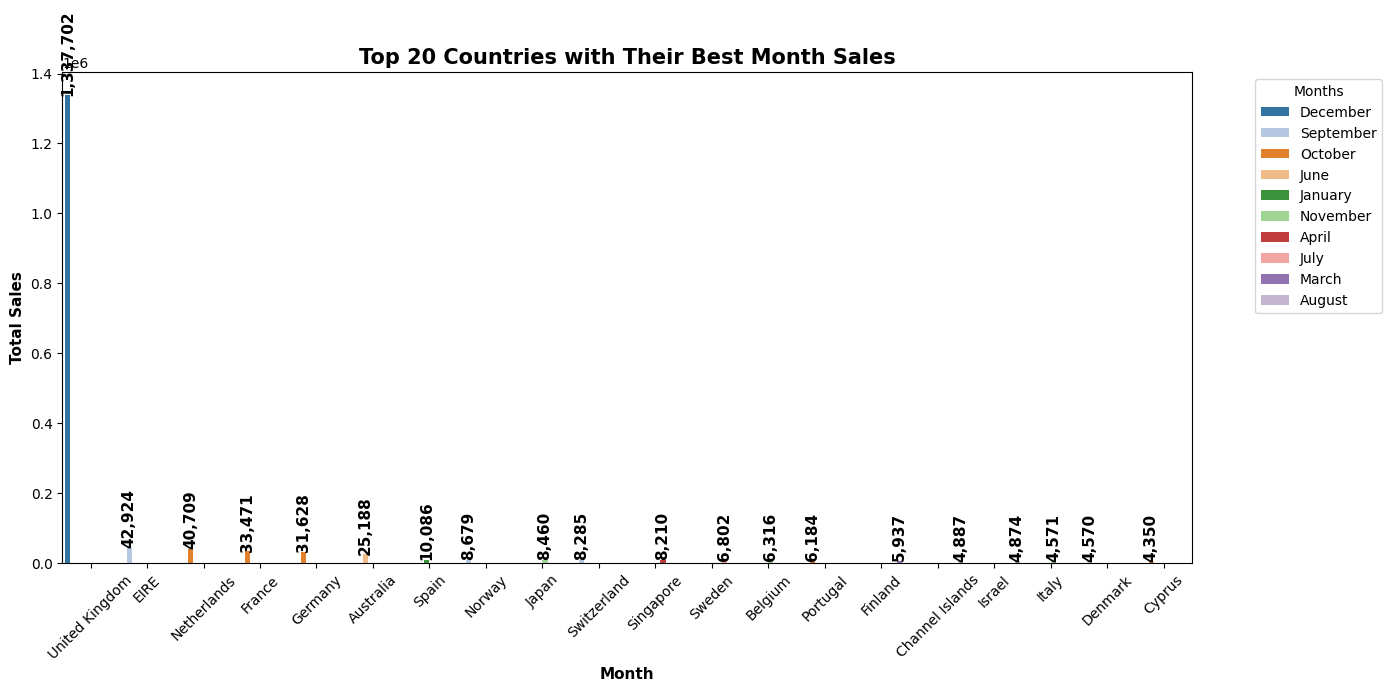

In [46]:
# Bar plot to show top 20 Countries with Most sales according to date:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x="Country",y="Total_Sales",data=top_sales_per_country,
    hue="Month",palette="tab20", width=0.9)

# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha="center", va="bottom", fontsize=11, fontweight="bold", rotation=90)

# Adding title, lable to our plot:
plt.title("Top 20 Countries with Their Best Month Sales", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=11, fontweight="bold")
plt.ylabel("Total Sales", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.legend(title="Months", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [47]:
# Save the values with excluding the 1st one:
top_sales_per_country_excluded = top_sales_per_country.iloc[1:]

print("Saved result by excluding the 1st country:")
display(top_sales_per_country_excluded.head(5))

Saved result by excluding the 1st country:


,Country,Month,Total_Sales
83,EIRE,September,42923.70
186,Netherlands,October,40708.65
108,France,October,33471.05
120,Germany,October,31628.42
6,Australia,June,25187.77


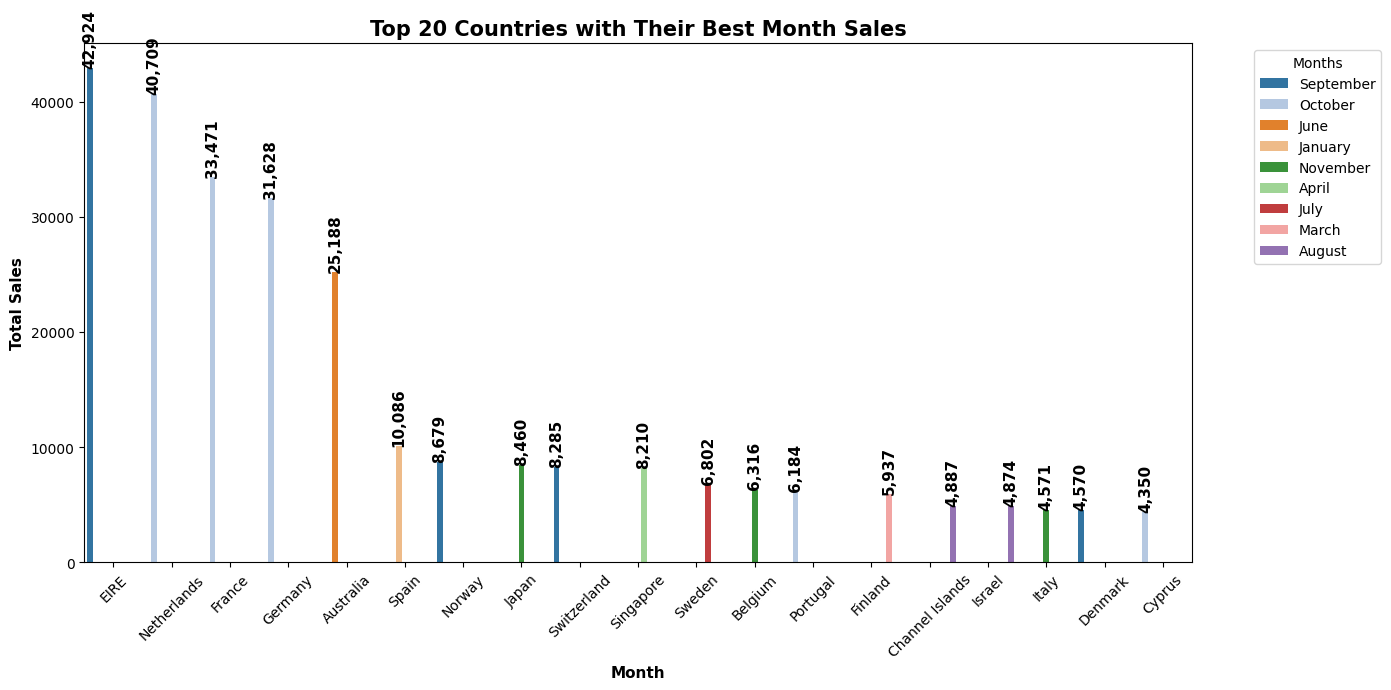

In [48]:
# Bar plot to show top 20 Countries with Most sales according to date:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x="Country",y="Total_Sales",data=top_sales_per_country_excluded,
    hue="Month",palette="tab20", width=0.9)

# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha="center", va="bottom", fontsize=11, fontweight="bold", rotation=90)

# Adding title, lable to our plot:
plt.title("Top 20 Countries with Their Best Month Sales", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=11, fontweight="bold")
plt.ylabel("Total Sales", fontsize=11, fontweight="bold")

plt.xticks(rotation=45)
plt.legend(title="Months", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**During Multivariate Analysis we have Analysis "Country", "InvoiceDate", "Quantity" & "UnitPrice" columns and plot few bars plot to see detils.**

<a id="Step:7"></a>

## Step 7:- 
**Categorical Feature Analysis:**

**Analysing "StockCode" column for Categorical Feature Analysis.**

In [49]:
# Which StockCode occured most time:
Top_StockCode = (E_Commerce_df_new["StockCode"].value_counts().reset_index().
                   sort_values(by= "count", ascending=False).head(20))
Top_StockCode

,StockCode,count
0,85123A,2258
1,85099B,2112
2,22423,2009
3,47566,1700
4,20725,1582
5,84879,1476
6,22197,1418
7,22720,1394
8,21212,1352
9,22383,1307


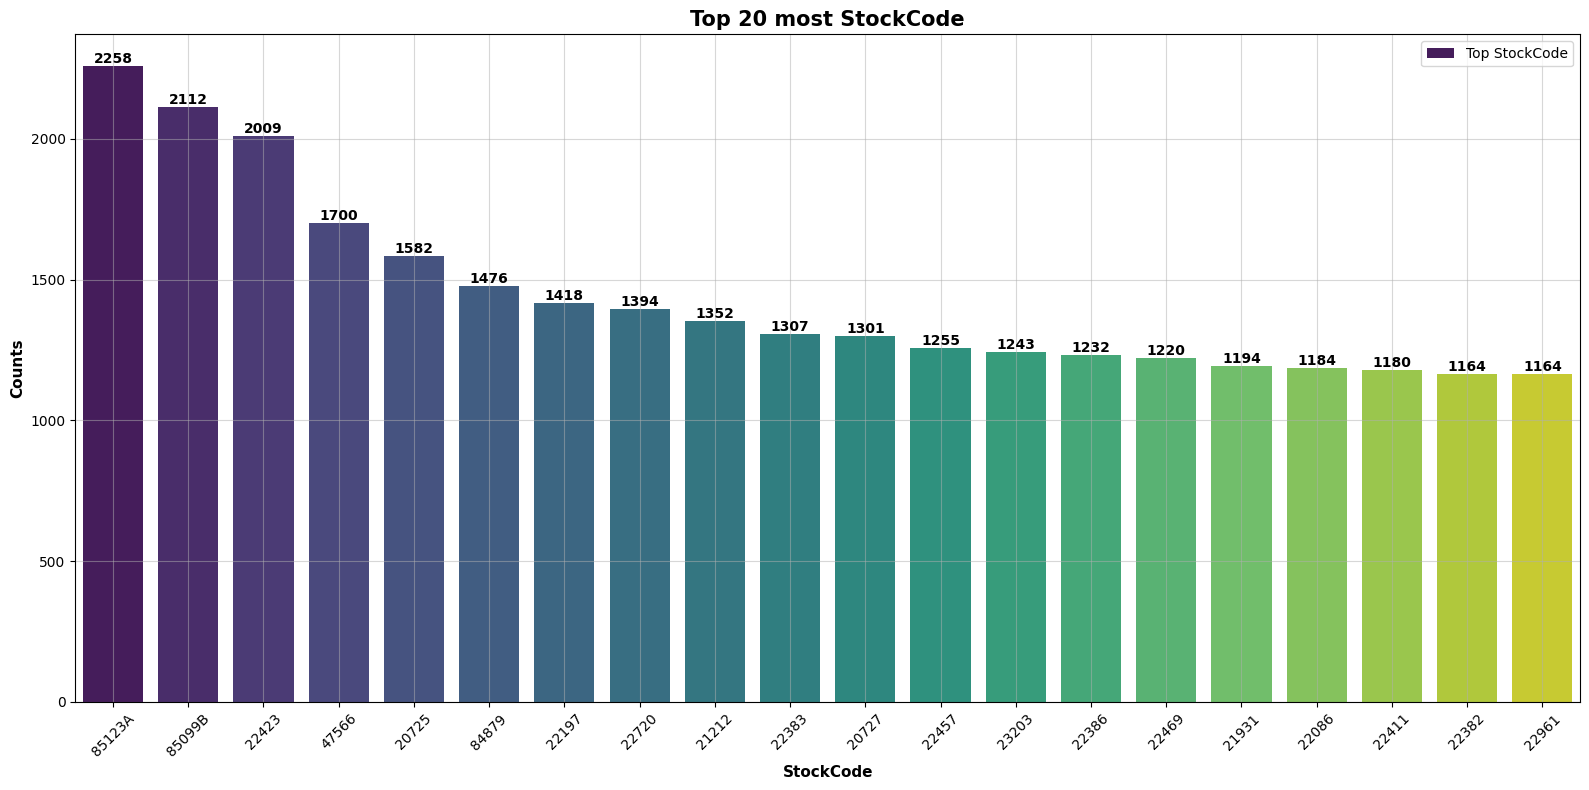

In [50]:
# Bar plot to show top 20 StockCode:
plt.figure(figsize=(16, 8))
Bar_plot = sns.barplot(x="StockCode",y="count",data=Top_StockCode, palette="viridis",
                      label="Top StockCode")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 most StockCode", fontsize=15, fontweight="bold")
plt.xlabel("StockCode", fontsize=11, fontweight="bold")
plt.ylabel("Counts", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Analysing "Description" column for Categorical Feature Analysis.**

In [51]:
# Which Description occured most time:
Top_Description = (E_Commerce_df_new["Description"].value_counts().reset_index().
                   sort_values(by= "count", ascending=False).head(20))
Top_Description

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2907
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2009
3,PARTY BUNTING,1700
4,LUNCH BAG RED RETROSPOT,1581
5,ASSORTED COLOUR BIRD ORNAMENT,1476
6,SET OF 3 CAKE TINS PANTRY DESIGN,1392
7,PACK OF 72 RETROSPOT CAKE CASES,1352
8,LUNCH BAG BLACK SKULL.,1301
9,NATURAL SLATE HEART CHALKBOARD,1255


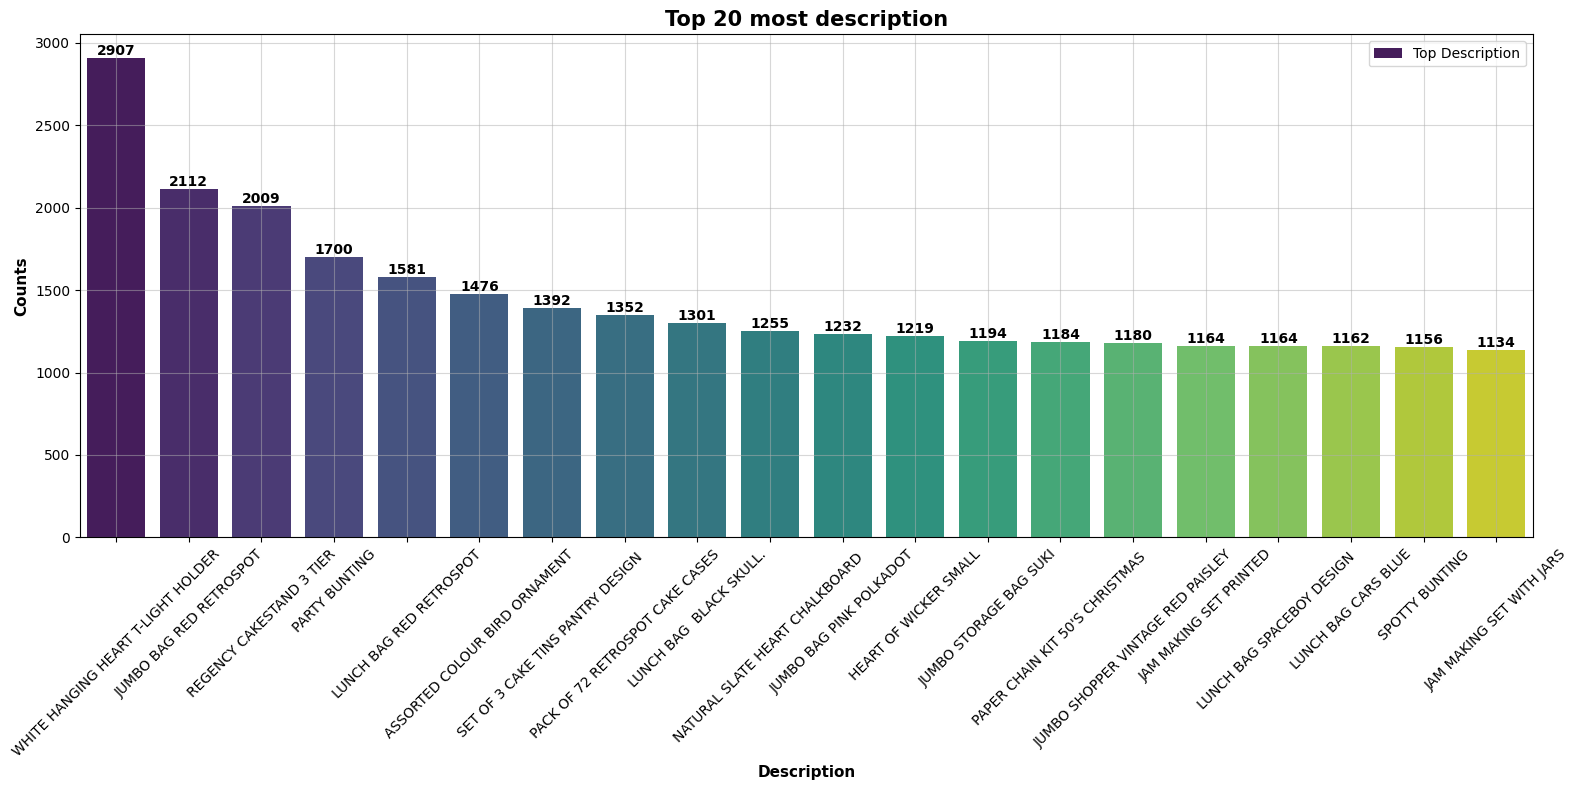

In [52]:
# Bar plot to show top 20 description:
plt.figure(figsize=(16, 8))
Bar_plot = sns.barplot(x="Description",y="count",data=Top_Description, palette="viridis",
                      label="Top Description")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:    
plt.title("Top 20 most description", fontsize=15, fontweight="bold")
plt.xlabel("Description", fontsize=11, fontweight="bold")
plt.ylabel("Counts", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**During Categorical Feature Analysis we have Analysis "StockCode" & "Description" columns with bar plots to Analysis Which "StockCode" & "Description" has most sales.**

<a id="Step:8"></a>

## Step 8:- 
**Outlier Detection:**

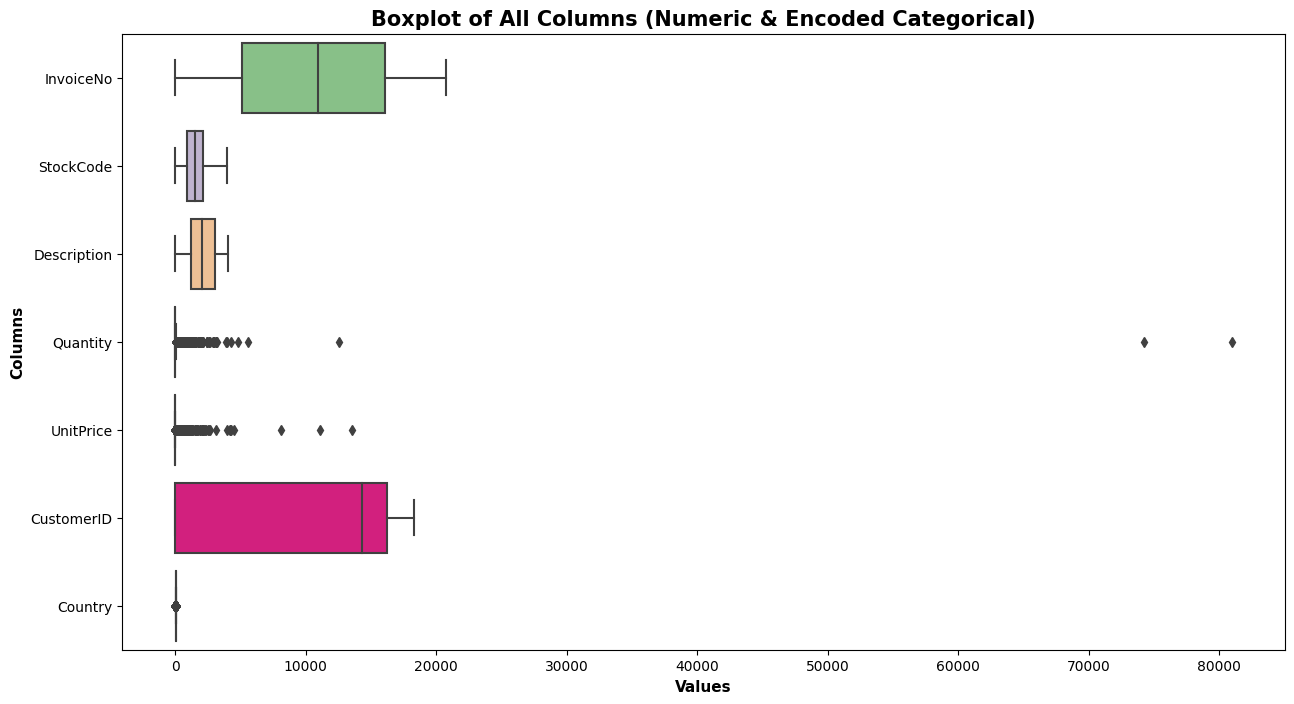

In [53]:
# Create copy to handle categorical by encoding them:
df_encoded = E_Commerce_df_new.copy()

# Convert categorical columns to category codes for plotting:
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot boxplots for all categorical and numerical columns:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_encoded, orient="h", palette= "Accent")

# Adding title, lable to our plot:    
plt.title("Boxplot of All Columns (Numeric & Encoded Categorical)", fontsize=15,
          fontweight="bold")
plt.xlabel("Values", fontsize=11, fontweight="bold")
plt.ylabel("Columns", fontsize=11, fontweight="bold")
plt.show()

In [54]:
# Identify numeric columns only:
numeric_cols = E_Commerce_df_new.select_dtypes(include='number').columns

# Dictionary to store outliers:
outlier_summary = {}

# Calculating outliers values:
for col in numeric_cols:
    Q1 = E_Commerce_df_new[col].quantile(0.25)
    Q3 = E_Commerce_df_new[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Get outlier values for numeric column:
    outliers = E_Commerce_df_new[(E_Commerce_df_new[col] < lower) | (
        E_Commerce_df_new[col] > upper)][col]

    # If outliers exist, add to dictionary:
    if not outliers.empty:
        outlier_summary[col] = outliers

# Display outlier columns:
for col, values in outlier_summary.items():
    print(f"Outliers in '{col}' column:")        

Outliers in 'Quantity' column:
Outliers in 'UnitPrice' column:


In [55]:
# Convert dictionary to DataFrame for better visualization:
outlier_df = pd.DataFrame([(col, val) for col, vals in outlier_summary.items()
                           for val in vals],
                          columns=["Column", "Outlier_Value"])

# Show outlier:
display(outlier_df)

,Column,Outlier_Value
0,Quantity,32.00
1,Quantity,48.00
2,Quantity,36.00
3,Quantity,80.00
4,Quantity,32.00
...,...,...
65177,UnitPrice,18.00
65178,UnitPrice,11.95
65179,UnitPrice,8.50
65180,UnitPrice,9.95


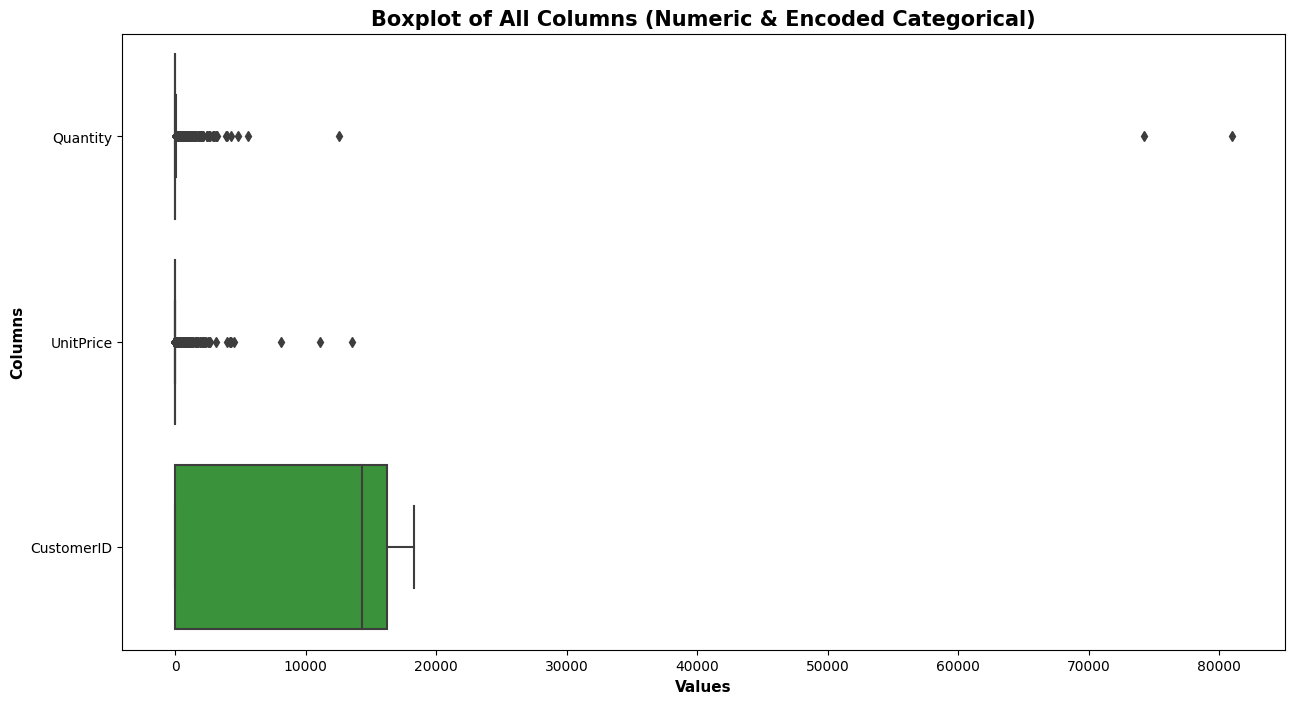

In [56]:
# Plot boxplots for all numeric columns:
plt.figure(figsize=(15, 8))
sns.boxplot(data=E_Commerce_df_new, orient="h")

# Adding title, lable to our plot:    
plt.title("Boxplot of All Columns (Numeric & Encoded Categorical)", fontsize=15,
          fontweight="bold")
plt.xlabel("Values", fontsize=11, fontweight="bold")
plt.ylabel("Columns", fontsize=11, fontweight="bold")
plt.show()

#### Removing outliers:

In [57]:
# Printing out the shape of our date before removing outlier:
print("Original shape:", E_Commerce_df_new.shape)

# Removing outliers from our data:
for col in numeric_cols:
    Q1 = E_Commerce_df_new[col].quantile(0.25)
    Q3 = E_Commerce_df_new[col].quantile(0.75)
    
    # calculating IQR, lower and upper values:
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keeping values within those range:
    E_Commerce_df_new = E_Commerce_df_new[(E_Commerce_df_new[col] >= lower) 
                                          & (E_Commerce_df_new[col] <= upper)]

# Printing out the shape of our date after removing outlier:
print("After removing outliers:", E_Commerce_df_new.shape)

Original shape: (526051, 8)
After removing outliers: (461180, 8)


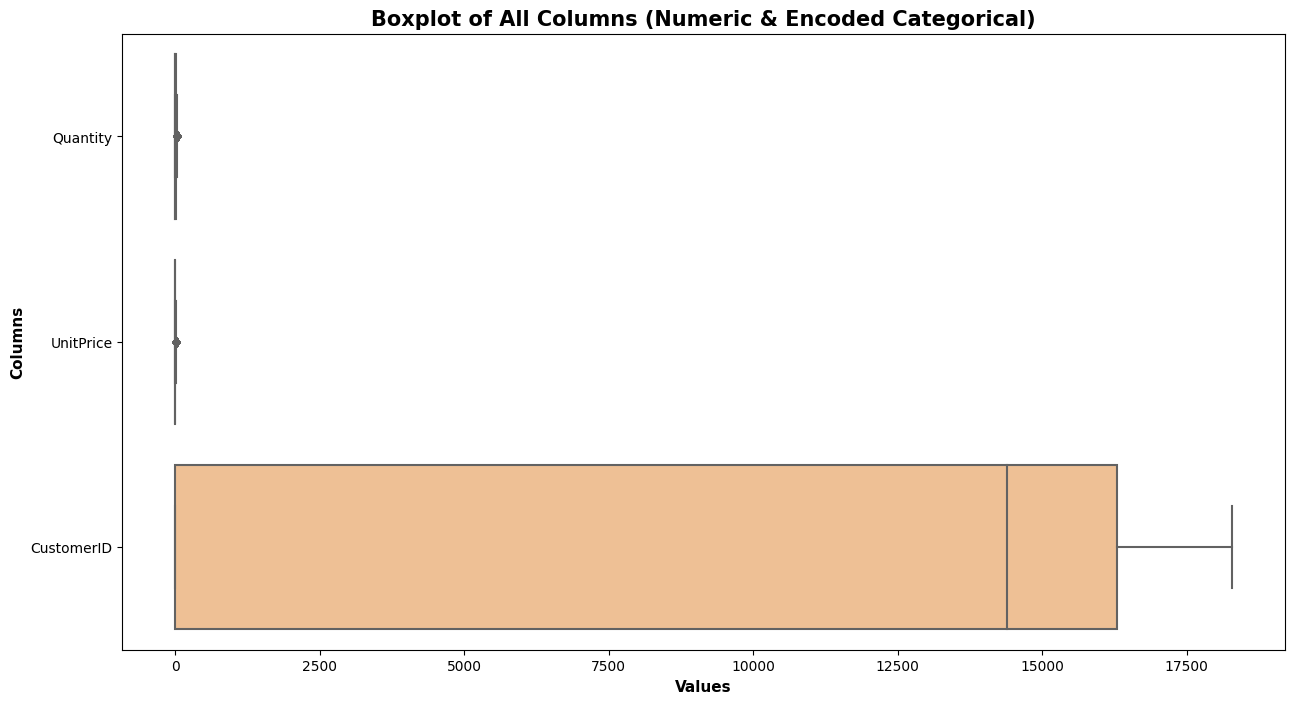

In [58]:
# Plot boxplots for all numeric columns:
plt.figure(figsize=(15, 8))
sns.boxplot(data=E_Commerce_df_new, orient="h", palette= "Accent")

# Adding title, lable to our plot:    
plt.title("Boxplot of All Columns (Numeric & Encoded Categorical)", fontsize=15,
          fontweight="bold")
plt.xlabel("Values", fontsize=11, fontweight="bold")
plt.ylabel("Columns", fontsize=11, fontweight="bold")
plt.show()

**During Outlier Detection we have Analysis that "Quantity" & "UnitPrice" columns contains some outliers values which was removed and after removed all those outliers values now our dataset contains 461,180 rows and 8 columns.**

<a id="Step:9"></a>

## Step 9:- 
**Correlation:**

## Let's start with only numeric columns to calculate correlation matrix:

In [59]:
# Using numeric values to know correlations between numeric columns:
numeric_df = E_Commerce_df_new.select_dtypes(include='number')

# Compute correlation matrix:
correlation_matrix_numeric = numeric_df.corr(method='pearson')

# Print out Correlation Matrix: 
print("Correlation Matrix:")
display(correlation_matrix_numeric)

Correlation Matrix:


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.349995,0.288077
UnitPrice,-0.349995,1.000000,-0.179847
CustomerID,0.288077,-0.179847,1.000000


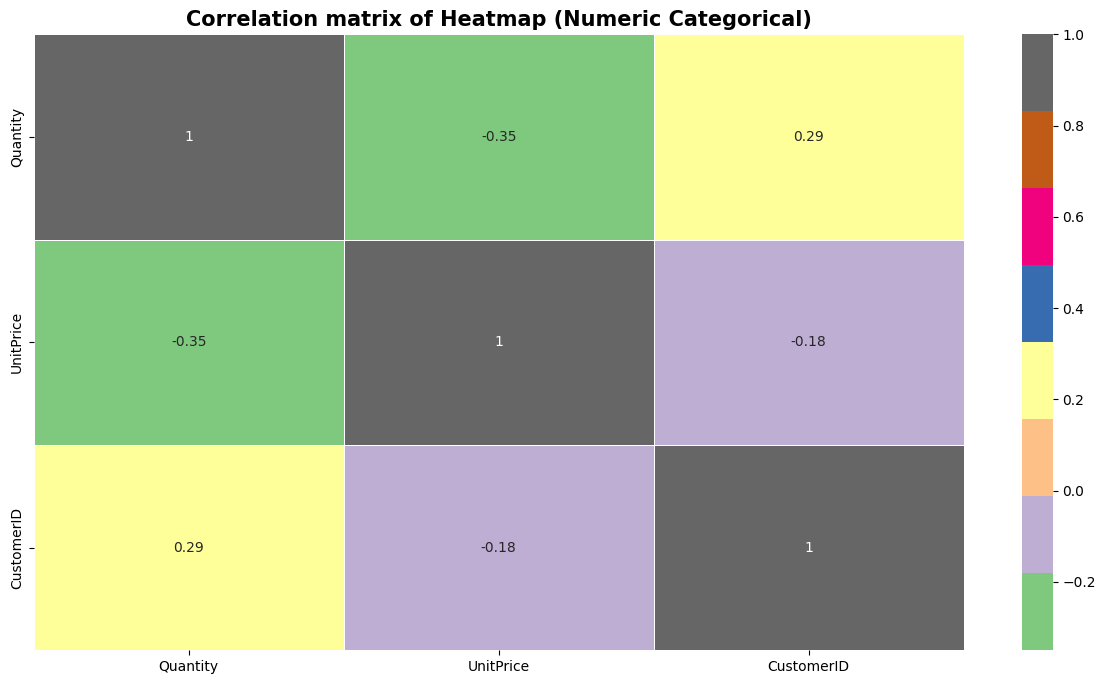

In [60]:
# Plot boxplots for all numeric columns:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap= "Accent", linewidths=0.5)

# Adding title, lable to our plot:    
plt.title("Correlation matrix of Heatmap (Numeric Categorical)", fontsize=15,fontweight="bold")
plt.show()

## Let's calculate correlation matrix of all columns:

In [61]:
# Printing out the encoded data which was calculate in outliers part:
df_encoded

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3424,3860,6,2010-12-01 08:26:00,2.55,17850,36
1,0,2738,3868,6,2010-12-01 08:26:00,3.39,17850,36
2,0,2965,893,8,2010-12-01 08:26:00,2.75,17850,36
3,0,2908,1871,6,2010-12-01 08:26:00,3.39,17850,36
4,0,2907,2863,6,2010-12-01 08:26:00,3.39,17850,36
...,...,...,...,...,...,...,...,...
541903,20724,2111,734,4,2011-12-09 12:50:00,4.15,12680,13
541904,20724,1492,2335,12,2011-12-09 12:50:00,0.85,12680,13
541905,20724,1768,723,6,2011-12-09 12:50:00,2.10,12680,13
541906,20724,2109,729,4,2011-12-09 12:50:00,4.15,12680,13


In [62]:
# Compute correlation matrix:
correlation_matrix = df_encoded.corr(method='pearson')

# Print out Correlation Matrix: 
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.065895,0.027073,0.000466,0.994175,-0.004637,0.079633,-0.003394
StockCode,0.065895,1.000000,-0.020732,0.000646,0.065374,0.050387,0.002961,0.006589
Description,0.027073,-0.020732,1.000000,0.001407,0.028308,-0.011606,0.005682,-0.012059
Quantity,0.000466,0.000646,0.001407,1.000000,0.000833,-0.003831,0.024412,-0.016219
InvoiceDate,0.994175,0.065374,0.028308,0.000833,1.000000,-0.005915,0.089990,-0.008134
UnitPrice,-0.004637,0.050387,-0.011606,-0.003831,-0.005915,1.000000,-0.037877,-0.003886
CustomerID,0.079633,0.002961,0.005682,0.024412,0.089990,-0.037877,1.000000,-0.059019
Country,-0.003394,0.006589,-0.012059,-0.016219,-0.008134,-0.003886,-0.059019,1.000000


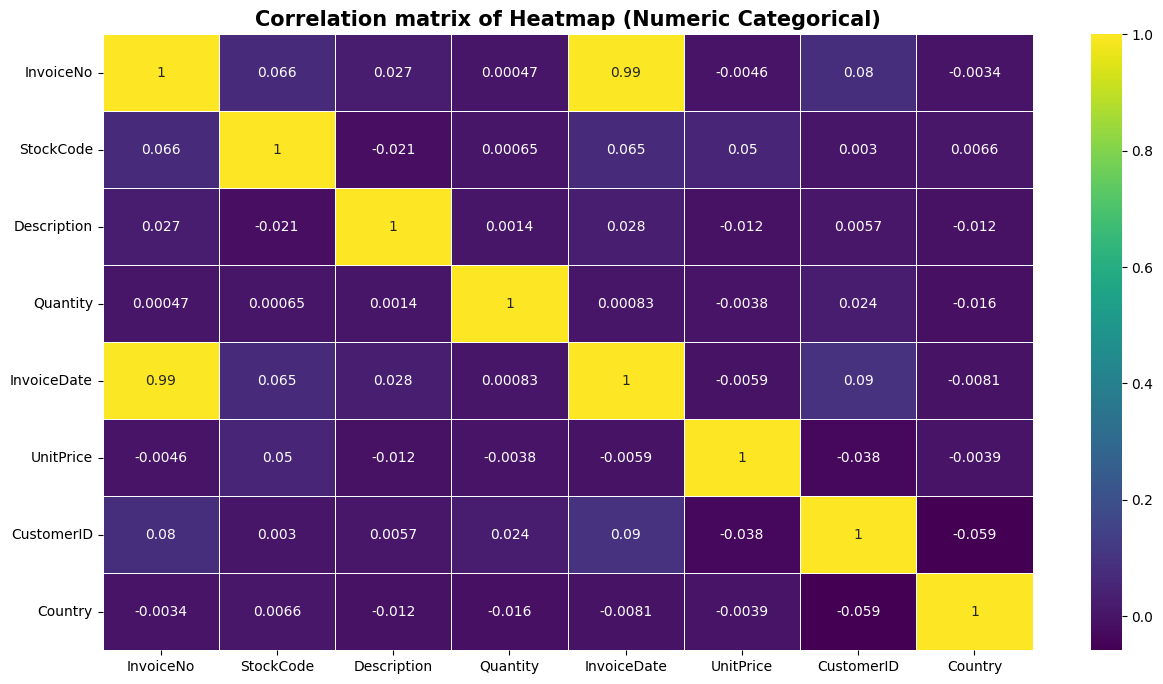

In [63]:
# Plot boxplots for all numeric columns:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap= "viridis", linewidths=0.5)

# Adding title, lable to our plot:    
plt.title("Correlation matrix of Heatmap (Numeric Categorical)", fontsize=15,fontweight="bold")
plt.yticks(rotation=360)
plt.show()

**During calculate correlation matrix we have found that:**

- **InvoiceNo & InvoiceDate** columns have → **0.99** (very strong positive correlation)
- **InvoiceNo & StockCode** columns have → **0.066** (weak positive correlation)
- **InvoiceNo & CustomerID** columns have → **0.08** (weak positive correlation)
- **InvoiceDate & CustomerID** columns have → **0.09** (weak positive correlation)

<a id="Task:2"></a>
# 💠 2. Feature Engineering:

- **1:[Creating new columns as years, months from InvoiceDate & Total_sales:](#Feature_Engineering_Step:1)**

- **2:[Createing plots for better insights:](#Feature_Engineering_Step:2)**

<a id="Feature_Engineering_Step:1"></a>

## Step 1:-
**Lets create new columns as years, months from InvoiceDate & Total_sales.**

In [64]:
# Printing out shape of our dataset before createing new features: 
print("Shape of our dataset before createing new features:- ",
      E_Commerce_df_new.shape)

# Createing new features as "Year", "Months" & "Total_sales".
E_Commerce_df_new["Year"] = E_Commerce_df_new['InvoiceDate'].dt.year
E_Commerce_df_new["Months"] = E_Commerce_df_new['InvoiceDate'].dt.month_name()
E_Commerce_df_new["Total_sales"] = E_Commerce_df_new["Quantity"] * E_Commerce_df_new["UnitPrice"]

# Printing out shape of our dataset before createing new features:
print("Shape of our dataset after createing new features:- ",
      E_Commerce_df_new.shape)

# Printing out our data after createing new features:
E_Commerce_df_new.head(5)

Shape of our dataset before createing new features:-  (461180, 8)
Shape of our dataset after createing new features:-  (461180, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Months,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,December,20.34


**In the above blocks new columns are created as years, months & Total_sales.**

<a id="Feature_Engineering_Step:2"></a>

## Step 2:-
**Createing plots for better insights.**

## PlotNo: 1
**Sales accordingly to months:**

In [65]:
# Group by months and total sales:
Months_sales = (E_Commerce_df_new.groupby("Months")["Total_sales"]
                .sum().reset_index().sort_values(by="Total_sales", ascending=False))

# Rename columns:
Months_sales.columns = ["Months", "Total_sales"]

# define month order:
month_order = list(calendar.month_name)[1:]

# Make Months categorical with month_order:
Months_sales["Months"] = pd.Categorical(Months_sales["Months"], categories=month_order,
                                             ordered=True)

print("Total sales according to months:")
display(Months_sales)

Total sales according to months:


,Months,Total_sales
9,November,808891.090
2,December,645042.510
10,October,615182.520
11,September,563534.562
8,May,399973.510
1,August,376769.290
5,July,372752.631
6,June,363891.170
7,March,359012.250
4,January,321409.060


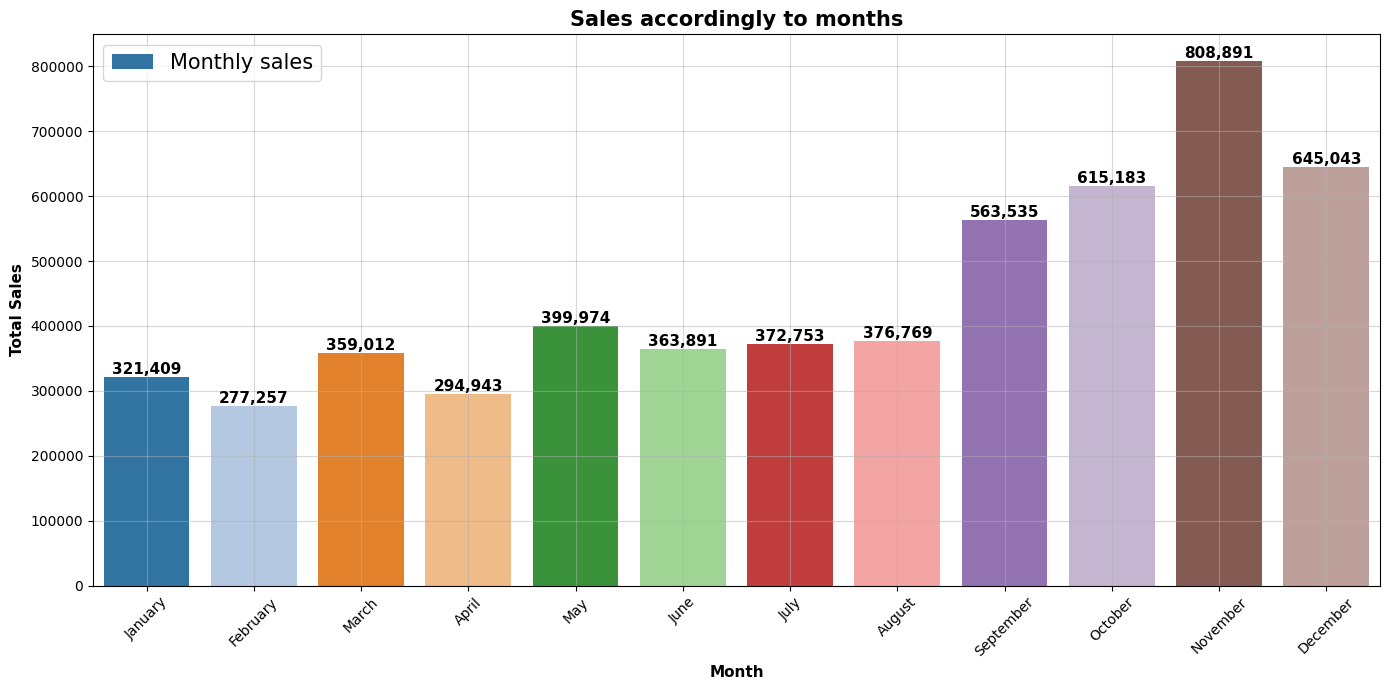

In [66]:
# Bar plot to sales accordingly to months:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x="Months",y="Total_sales",data=Months_sales,
                       palette="tab20", label="Monthly sales")

# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha="center", va="bottom", fontsize=11, fontweight="bold")

# Adding title, lable to our plot:
plt.title("Sales accordingly to months", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=11, fontweight="bold")
plt.ylabel("Total Sales", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## PlotNo: 2
**Quantity sold accordingly to months:**

In [67]:
# Group by Quantity and Months:
Months_sales_Quantity = (E_Commerce_df_new.groupby("Months")["Quantity"]
                .sum().reset_index().sort_values(by="Quantity", ascending=False))

# Rename columns:
Months_sales_Quantity.columns = ["Months", "Quantity"]

# define month order:
month_order = list(calendar.month_name)[1:]

# Make Months categorical with month_order:
Months_sales_Quantity["Months"] = pd.Categorical(Months_sales_Quantity["Months"], categories=month_order,
                                             ordered=True)

print("Quantity sold according to months:")
display(Months_sales_Quantity)

Quantity sold according to months:


,Months,Quantity
9,November,420640
10,October,329483
2,December,311767
11,September,305528
5,July,210408
1,August,207294
8,May,204939
6,June,193861
7,March,190110
4,January,170442


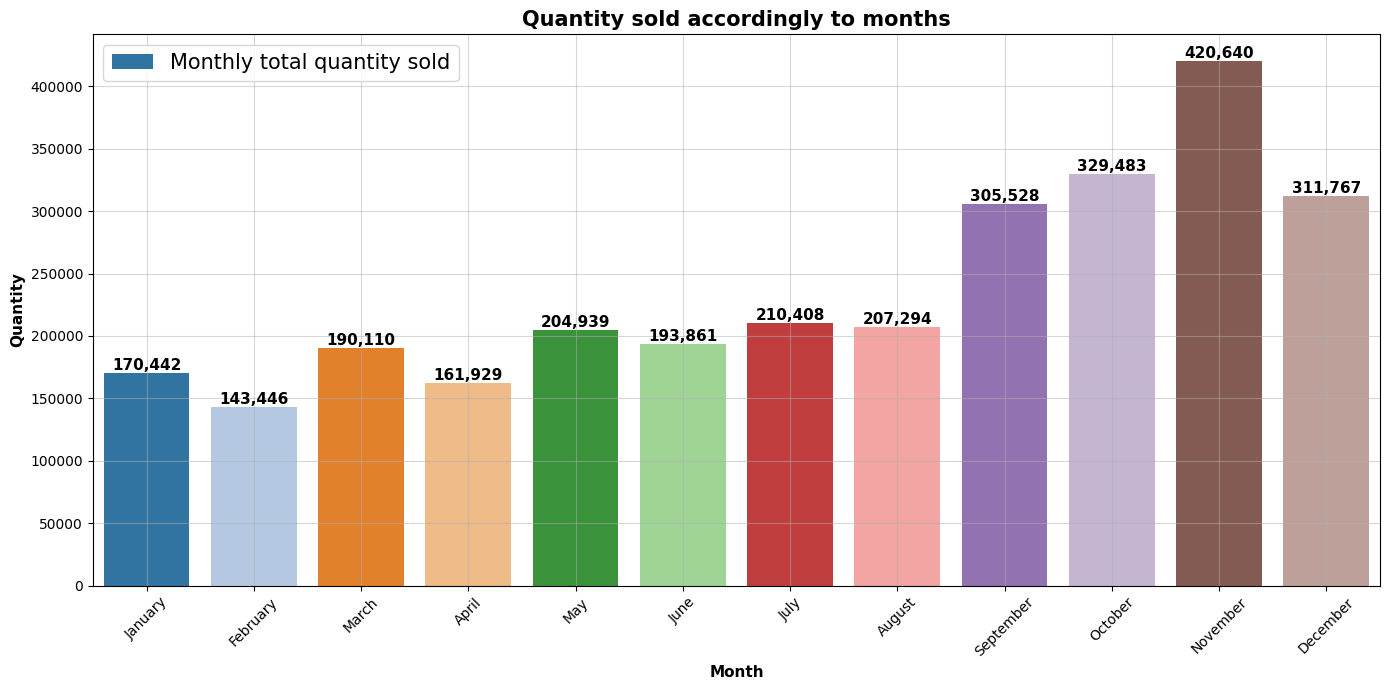

In [68]:
# Bar plot to show quantity sold accordingly to months:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x="Months",y="Quantity",data=Months_sales_Quantity,
                       palette="tab20", label="Monthly total quantity sold")

# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha="center", va="bottom", fontsize=11, fontweight="bold")

# Adding title, lable to our plot:
plt.title("Quantity sold accordingly to months", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=11, fontweight="bold")
plt.ylabel("Quantity", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## Top sales according to country year wise:

In [69]:
# Group by Year, Country & total sales:
year_country_sales = (E_Commerce_df_new.groupby(["Year", "Country"])["Total_sales"]
                      .sum().reset_index())

# Get top 10 countries per year:
Top_10_per_year = (year_country_sales.groupby("Year", group_keys=False)
                  .apply(lambda x: x.nlargest(10, "Total_sales")).reset_index(drop=True))

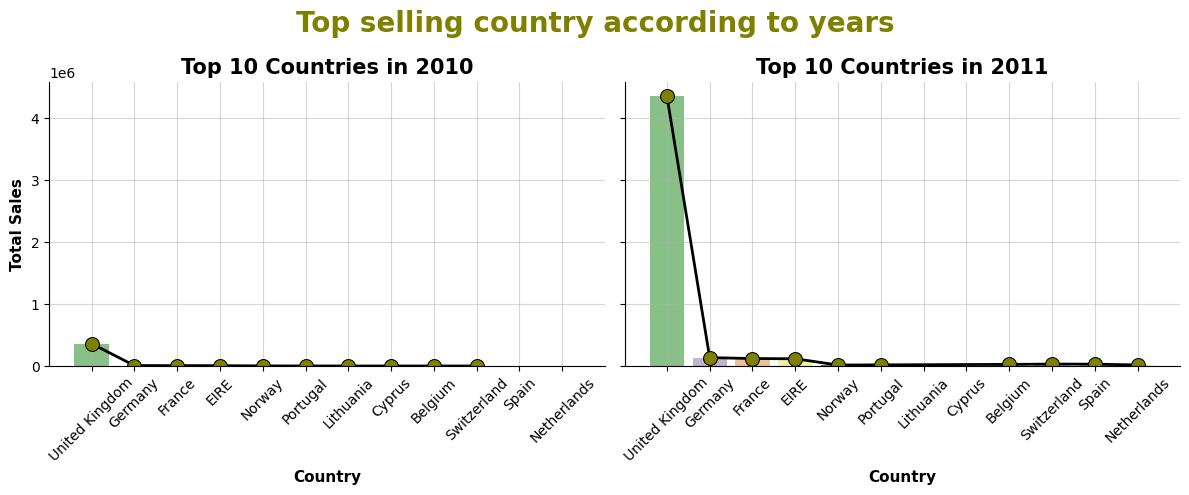

In [70]:
# Combined plot to show top 10 country sales according to years:
combined_plot = sns.catplot(x="Country", y="Total_sales", col="Year", data=Top_10_per_year,
                kind="bar",col_wrap=2, height=5, aspect=1.2, palette="Accent")

# Adding a lineplot to our plot:
for L_plot, year in zip(combined_plot.axes.flat, sorted(Top_10_per_year["Year"].unique())):
    subset = Top_10_per_year[Top_10_per_year["Year"] == year]
    
    sns.lineplot(x="Country", y="Total_sales", data=subset, 
                 marker="o", markersize=10, markerfacecolor="olive", markeredgecolor="black", 
                 linewidth=2, color="black", ax=L_plot)
    
    # Custom title for each subplot:
    L_plot.set_title(f"Top 10 Countries in {year}", fontsize=15, fontweight="bold")

# Adding title, lable to our plot:    
plt.suptitle("Top selling country according to years", fontsize=20, fontweight="bold",
             color="olive")    

combined_plot.set_axis_labels("Country", "Total Sales", fontsize=11, fontweight="bold")

# Adding grid & ticks to our plot:
for L_plot in combined_plot.axes.flat:
    L_plot.grid(True, linestyle='-', alpha=0.5)
    L_plot.tick_params(axis="x", rotation=45)
     
plt.tight_layout()
plt.show()

## Top sales according to country year wise Without United Kingdom:

In [71]:
# Creating top 10 country countries without 'United Kingdom':
Without_UK = year_country_sales[year_country_sales["Country"] != "United Kingdom"]

# Get top 10 countries per year:
Top_10_without_UK = (Without_UK.groupby("Year", group_keys=False)
                  .apply(lambda x: x.nlargest(10, "Total_sales")).reset_index(drop=True))

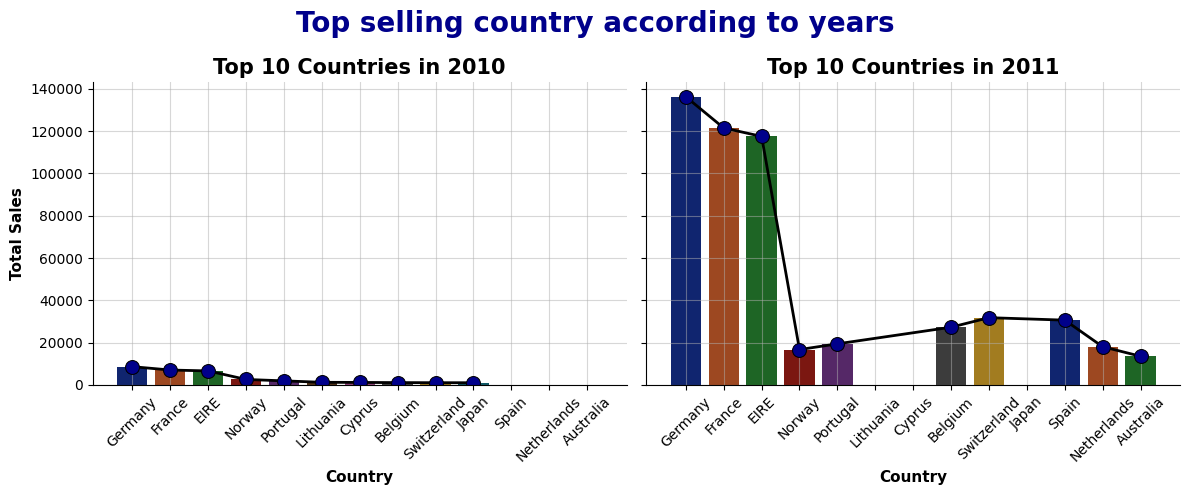

In [72]:
# Combined plot to show top 10 country sales according to years:
combined_plot = sns.catplot(x="Country", y="Total_sales", col="Year", data=Top_10_without_UK,
                kind="bar",col_wrap=2, height=5, aspect=1.2, palette="dark")

# Adding a lineplot to our plot:
for L_plot, year in zip(combined_plot.axes.flat, sorted(Top_10_without_UK["Year"].unique())):
    subset = Top_10_without_UK[Top_10_without_UK["Year"] == year]
    
    sns.lineplot(x="Country", y="Total_sales", data=subset, 
                 marker="o", markersize=10, markerfacecolor="darkblue", markeredgecolor="black", 
                 linewidth=2, color="black", ax=L_plot)
    
    # Custom title for each subplot:
    L_plot.set_title(f"Top 10 Countries in {year}", fontsize=15, fontweight="bold")

# Adding title, lable to our plot:    
plt.suptitle("Top selling country according to years", fontsize=20, fontweight="bold",
             color="darkblue")    

combined_plot.set_axis_labels("Country", "Total Sales", fontsize=11, fontweight="bold")

# Adding grid & ticks to our plot:
for L_plot in combined_plot.axes.flat:
    L_plot.grid(True, linestyle='-', alpha=0.5)
    L_plot.tick_params(axis="x", rotation=45)
     
plt.tight_layout()
plt.show()

**After creating new feature here are some plot which are plotted above:**

- **PlotNo-1:-**  Sales accordingly to months:
- **PlotNo-2:-** Quantity sold accordingly to months:
- **PlotNo-3:-** Top sales according to country year wise
- **PlotNo-4:-** Top sales according to country year wise Without United Kingdom

<a id="Task:3"></a>
# 💠 3. Model building:

- **1: [Future Sales Forecasting Prediction:](#Model_building_1)**
- **2: [Product Performance Analysis:](#Model_building_2)**

<a id="Model_building_1"></a>
## Future Sales Forecasting Prediction:

In [73]:
# Removing timestamp from InvoiceDate column for time series analysis:
E_Commerce_df_new["InvoiceDate"] = (E_Commerce_df_new["InvoiceDate"]
                                    .dt.to_period('M').dt.to_timestamp())

# Preparing data by groupby 'InvoiceDate' & 'Total_sales':
monthly_sales = (E_Commerce_df_new.groupby("InvoiceDate")["Total_sales"]
                 .sum().reset_index()).round(2)
monthly_sales

,InvoiceDate,Total_sales
0,2010-12-01,400005.34
1,2011-01-01,321409.06
2,2011-02-01,277257.30
3,2011-03-01,359012.25
4,2011-04-01,294942.53
5,2011-05-01,399973.51
6,2011-06-01,363891.17
7,2011-07-01,372752.63
8,2011-08-01,376769.29
9,2011-09-01,563534.56


In [74]:
# Creating new features as 'Month' & 'Year':
monthly_sales["Month"] = monthly_sales["InvoiceDate"].dt.month 
monthly_sales["Year"] = monthly_sales["InvoiceDate"].dt.year

monthly_sales

,InvoiceDate,Total_sales,Month,Year
0,2010-12-01,400005.34,12,2010
1,2011-01-01,321409.06,1,2011
2,2011-02-01,277257.30,2,2011
3,2011-03-01,359012.25,3,2011
4,2011-04-01,294942.53,4,2011
5,2011-05-01,399973.51,5,2011
6,2011-06-01,363891.17,6,2011
7,2011-07-01,372752.63,7,2011
8,2011-08-01,376769.29,8,2011
9,2011-09-01,563534.56,9,2011


In [75]:
# Splitting data for Train and Test:
X = monthly_sales[['Month', 'Year']]
y = monthly_sales['Total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)    

# Printing out X & Y tarin, test data: 
print("X Train value is:- \n",X_train,"\n")
print("X Test value is:- \n",X_test,"\n")
print("Y Train value is:- \n",y_train,"\n")
print("Y Test value is:- \n",y_test,"\n")

X Train value is:- 
    Month  Year
0     12  2010
1      1  2011
2      2  2011
3      3  2011
4      4  2011
5      5  2011
6      6  2011
7      7  2011
8      8  2011
9      9  2011 

X Test value is:- 
     Month  Year
10     10  2011
11     11  2011
12     12  2011 

Y Train value is:- 
 0    400005.34
1    321409.06
2    277257.30
3    359012.25
4    294942.53
5    399973.51
6    363891.17
7    372752.63
8    376769.29
9    563534.56
Name: Total_sales, dtype: float64 

Y Test value is:- 
 10    615182.52
11    808891.09
12    245037.17
Name: Total_sales, dtype: float64 



In [76]:
# Model building for time series analysis:

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
# Preparing predict dates for year 2012:
future_dates = pd.date_range("2012-01-01", "2012-12-01", freq="MS")
future_df = pd.DataFrame({"Year": future_dates.year, "Month": future_dates.month})

# Predicted sales for year 2012:
future_df['Predicted_Sales'] = model.predict(future_df[['Month','Year']]).round(2)

# Changing columns names for better clarity:
future_df = future_df.rename(columns={"Year": "Predicted_Year", "Month": "Predicted_Month"})

display(future_df)

,Predicted_Year,Predicted_Month,Predicted_Sales
0,2012,1,317028.51
1,2012,2,299809.32
2,2012,3,332410.55
3,2012,4,315376.04
4,2012,5,368421.97
5,2012,6,371239.56
6,2012,7,371770.20
7,2012,8,400099.42
8,2012,9,499808.02
9,2012,10,500802.83


In [78]:
# Filtering out only 2011 sales:
actual_2011 = monthly_sales[monthly_sales["Year"] == 2011][["Year", "Month", "Total_sales"]]

# Combining actual and Predicted sales with a separator:
combined_df = pd.concat([actual_2011.reset_index(drop=True),
                         pd.Series(["||"] * len(actual_2011), name="----"),
                         future_df.reset_index(drop=True)], axis=1)

# Converting months numbers to name: 
combined_df["Month"] = combined_df["Month"].apply(
    lambda x: calendar.month_name[int(x)] if str(x).isdigit() else x)

combined_df["Predicted_Month"] = combined_df["Predicted_Month"].apply(
    lambda x: calendar.month_name[int(x)] if str(x).isdigit() else x)

display(combined_df)

,Year,Month,Total_sales,----,Predicted_Year,Predicted_Month,Predicted_Sales
0,2011,January,321409.06,||,2012,January,317028.51
1,2011,February,277257.30,||,2012,February,299809.32
2,2011,March,359012.25,||,2012,March,332410.55
3,2011,April,294942.53,||,2012,April,315376.04
4,2011,May,399973.51,||,2012,May,368421.97
5,2011,June,363891.17,||,2012,June,371239.56
6,2011,July,372752.63,||,2012,July,371770.20
7,2011,August,376769.29,||,2012,August,400099.42
8,2011,September,563534.56,||,2012,September,499808.02
9,2011,October,615182.52,||,2012,October,500802.83


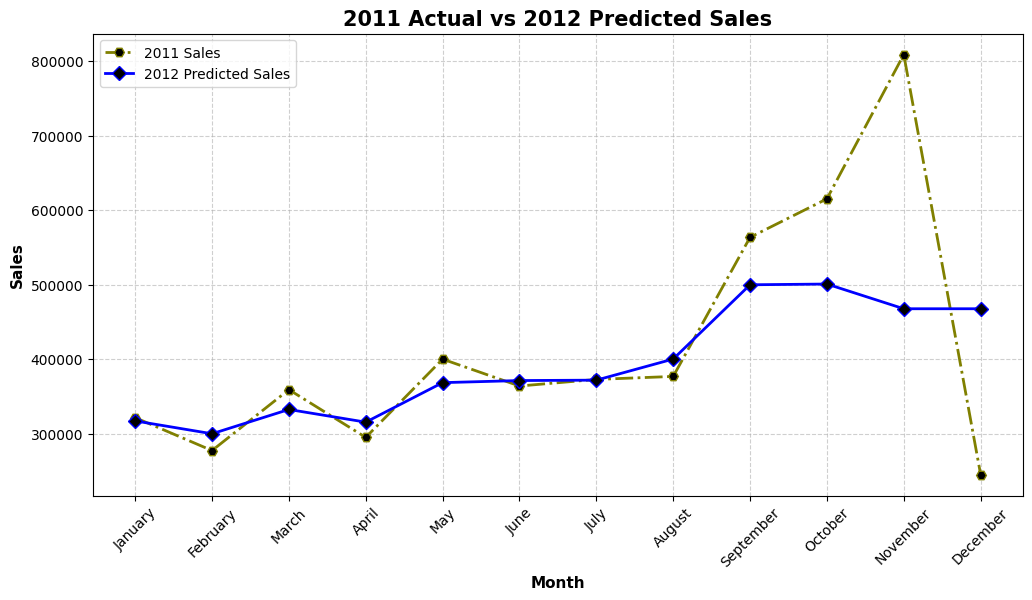

In [79]:
# combined plot to show sales in 2011 & Predicted_Sales for upcoming year:
plt.figure(figsize=(12,6))

# Ploting 2 line plots for total sales in 2011 & Predicted_Sales for upcoming year:
plt.plot(combined_df['Month'], combined_df['Total_sales'], color="olive",
         marker='H', markersize=7, markerfacecolor="black", linewidth=2, ls="-.",
         label='2011 Sales')

plt.plot(combined_df['Predicted_Month'], combined_df['Predicted_Sales'],color="blue",
         marker='D', markersize=7, markerfacecolor="black", linewidth=2, ls="-",
         label='2012 Predicted Sales')

# Adding title, lable to our plot:
plt.title("2011 Actual vs 2012 Predicted Sales", fontsize=15, fontweight='bold')
plt.xlabel("Month", fontsize=11, fontweight='bold')
plt.ylabel("Sales", fontsize=11, fontweight='bold')

# Adding grid & ticks to our plot:
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**In above blocks *Future Sales Forecasting Prediction* model was build where we used our data from December 2010 to December 2011 to train our model and Predict upcoming year sales.**

<a id="Model_building_2"></a>
# Product Performance Analysis:

- **1. [Sales Overview.](#PPA_Task_1)**
- **2. [Product-Wise Performance.](#PPA_Task_2)**
- **3. [Time-Based Performance.](#PPA_Task_3)**
- **4. [Profitability Analysis.](#PPA_Task_4)**

<a id="PPA_Task_1"></a>

##  Task:-1
**1. Sales Overview**

In [80]:
# Calculeing Total sales, Total quantity sold & Total number of Unique products:
Total_sales = E_Commerce_df_new["Total_sales"].sum().round(2)
Total_quantity_sold = E_Commerce_df_new["Quantity"].sum()
Total_number_unique_products = E_Commerce_df_new["Description"].nunique()

# Printing out all he above values:
print("Total Sales:", Total_sales)
print("Total Quantity Sold:", Total_quantity_sold)
print("Total number of unique Products:", Total_number_unique_products)

# Grouping by "Description" & "Quantity" for top products quantity:
top_product_quantity = (E_Commerce_df_new.groupby("Description")["Quantity"]
                   .sum().sort_values(ascending=False).reset_index().head(10))

# Printing out top 10 products:
print("Top 10 sold quantity are: ")
display(top_product_quantity)

Total Sales: 5398658.42
Total Quantity Sold: 2849847
Total number of unique Products: 3831
Top 10 sold quantity are: 


,Description,Quantity
0,PACK OF 72 RETROSPOT CAKE CASES,16422
1,WHITE HANGING HEART T-LIGHT HOLDER,14614
2,ASSORTED COLOUR BIRD ORNAMENT,14363
3,JUMBO BAG RED RETROSPOT,14072
4,LUNCH BAG RED RETROSPOT,10769
5,JAM MAKING SET PRINTED,9682
6,PACK OF 60 PINK PAISLEY CAKE CASES,9040
7,60 TEATIME FAIRY CAKE CASES,8901
8,VICTORIAN GLASS HANGING T-LIGHT,8836
9,LUNCH BAG BLACK SKULL.,8212


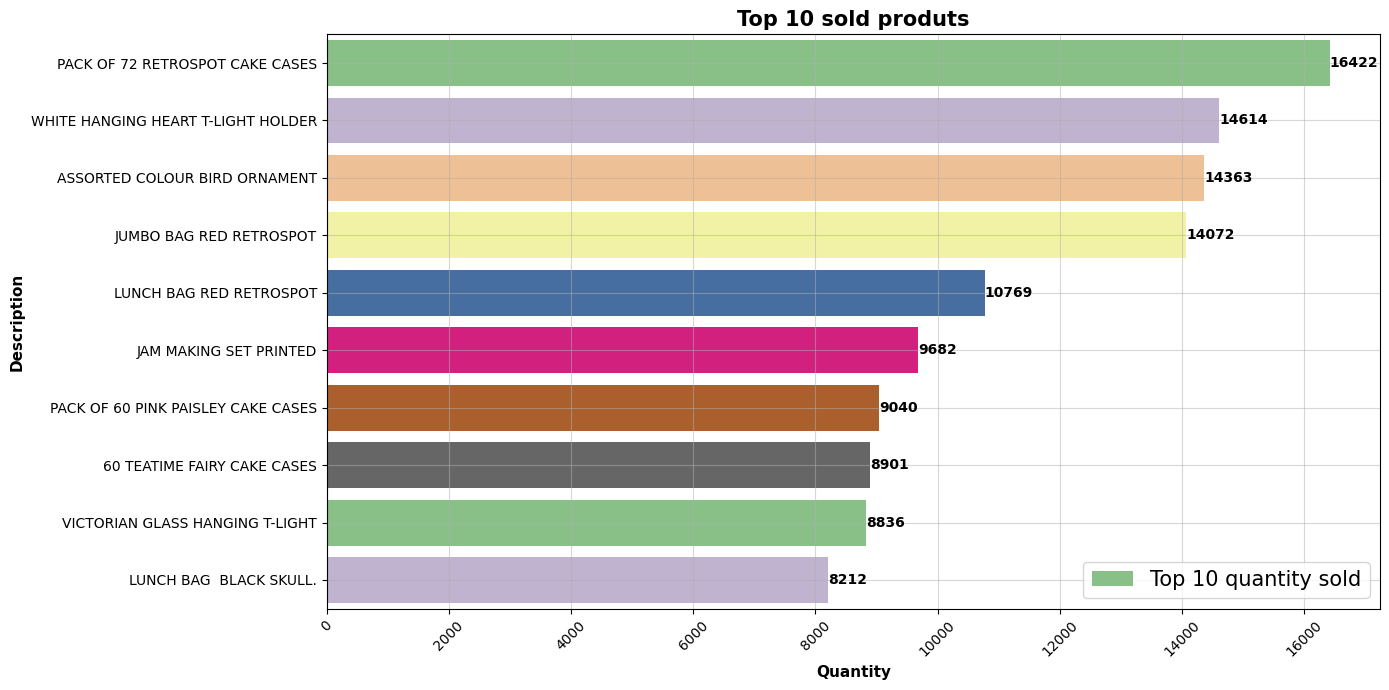

In [81]:
# Bar plot to show top 10 sold quantity:
plt.figure(figsize=(14, 7))
qu_bar_plot = sns.barplot(x= top_product_quantity["Quantity"], y= top_product_quantity
                          ["Description"], palette="Accent", label="Top 10 quantity sold")

# Annotate each marker with value:
for p in qu_bar_plot.patches:
    qu_bar_plot.annotate(f'{int(p.get_width())}',
               (p.get_width(), p.get_y() + p.get_height()/2),
               ha="left", va="center", fontsize=10, fontweight="bold")  

# Adding title, lable to our plot:
plt.title("Top 10 sold produts", fontsize=15, fontweight="bold")
plt.xlabel("Quantity", fontsize=11, fontweight="bold")
plt.ylabel("Description", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

**In above blocks *Sales Overview* was done where we know our top sold products till now with a bar plot where its shows top 10 products Description with it's Quantity.**

<a id="PPA_Task_2"></a>

##  Task:-2

**Product-Wise Performance**

In [82]:
# Grouping by "Description", "Total_sales", "Quantity" to get product wise Performance:
Product_Performance = (E_Commerce_df_new.groupby("Description").agg(
    Revenue=("Total_sales","sum"),
    Quantity=("Quantity","sum")).sort_values(by="Revenue", ascending=False).reset_index().head(10))

# Creating Average_Price:
Product_Performance["Average_Price"] = (Product_Performance["Revenue"] / 
                                        Product_Performance["Quantity"]).round(2)

display(Product_Performance)

,Description,Revenue,Quantity,Average_Price
0,WHITE HANGING HEART T-LIGHT HOLDER,36523.42,14614,2.50
1,PARTY BUNTING,36503.77,7380,4.95
2,JUMBO BAG RED RETROSPOT,32332.62,14072,2.30
3,JAM MAKING SET WITH JARS,24945.23,5710,4.37
4,ASSORTED COLOUR BIRD ORNAMENT,24838.11,14363,1.73
5,SPOTTY BUNTING,23725.90,4799,4.94
6,PAPER CHAIN KIT 50'S CHRISTMAS,22553.28,6708,3.36
7,NATURAL SLATE HEART CHALKBOARD,21375.21,6599,3.24
8,HOT WATER BOTTLE KEEP CALM,21266.71,4513,4.71
9,DOORMAT KEEP CALM AND COME IN,20941.66,2819,7.43


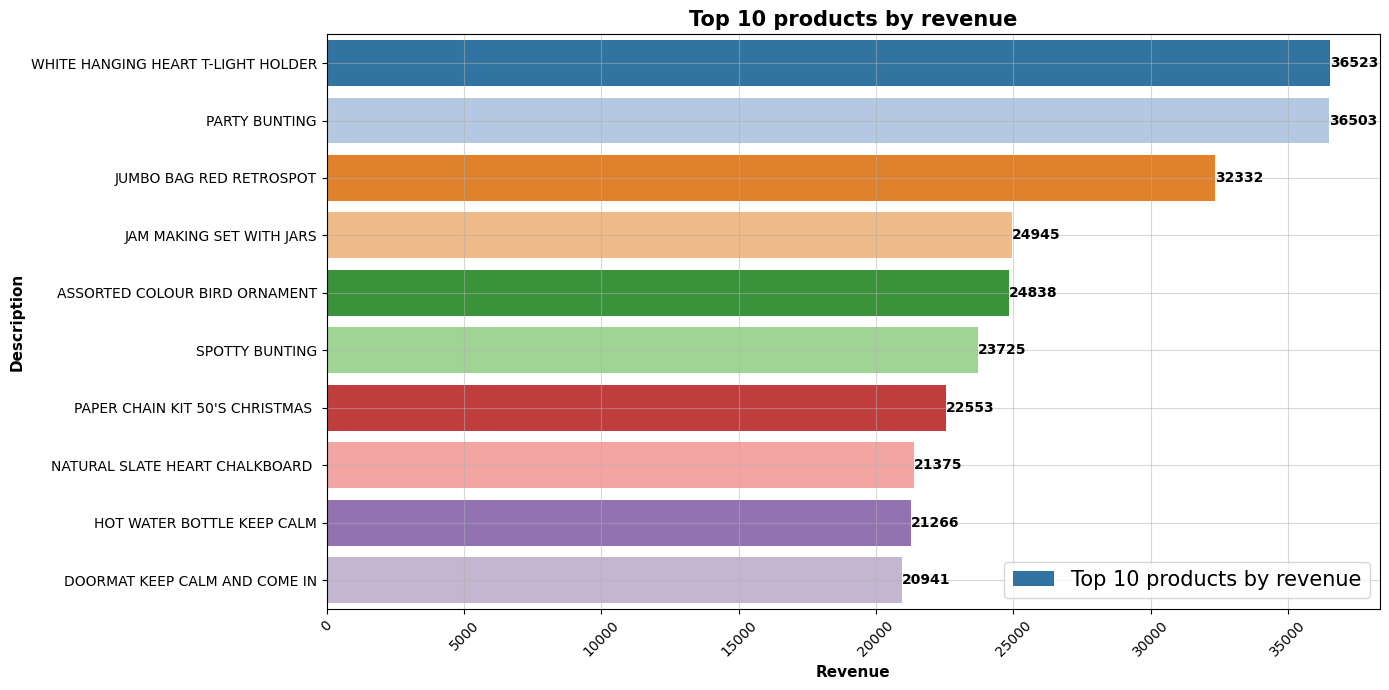

In [83]:
# Bar plot to show top 10 products by revenue:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x= Product_Performance["Revenue"], y= Product_Performance["Description"],
                       palette="tab20", label="Top 10 products by revenue")

# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_width())}',
               (p.get_width(), p.get_y() + p.get_height()/2),
               ha="left", va="center", fontsize=10, fontweight="bold")

# Adding title, lable to our plot:
plt.title("Top 10 products by revenue", fontsize=15, fontweight="bold")
plt.xlabel("Revenue", fontsize=11, fontweight="bold")
plt.ylabel("Description", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

**In above blocks *Product-Wise Performance* was done where we know our top 10 products by it's Revenue with a bar plot.**

<a id="PPA_Task_3"></a>

##  Task:-3
**Time-Based Performance**

In [84]:
# Grouping by "Months" & "Total_sales" to see monthly total sales:
monthly_total_sales = (E_Commerce_df_new.groupby("Months")["Total_sales"]
                       .sum().reset_index().round(2))

# shortinng months in a proper order: 
month_order = list(calendar.month_name)[1:]
monthly_total_sales["Months"] = pd.Categorical(monthly_total_sales["Months"],
                                          categories=month_order, ordered=True)
monthly_total_sales = monthly_total_sales.sort_values("Months").reset_index(drop=True)

# Grouping by "Months", "Description" & "Total_sales" to see top products per months:
top_product_per_month = (E_Commerce_df_new.groupby(["Months", "Description"])
                         ["Total_sales"].sum().reset_index())

# Picking up top product of the month: 
top_product_per_month = (top_product_per_month.loc[top_product_per_month
                         .groupby("Months")["Total_sales"].idxmax()]
                         .sort_values("Months").reset_index(drop=True)
                         [["Months", "Description"]])

# Merging both the groupby data: 
Time_Based_Performance = pd.merge(monthly_total_sales, top_product_per_month, on="Months")

# Changing columns names for better clarity:
Time_Based_Performance = Time_Based_Performance.rename(columns={
    "Total_sales": "Monthly_Total_Sales", "Description": "Product_Description"})

display(Time_Based_Performance)

,Months,Monthly_Total_Sales,Product_Description
0,January,321409.06,WHITE HANGING HEART T-LIGHT HOLDER
1,February,277257.30,SET OF 3 CAKE TINS PANTRY DESIGN
2,March,359012.25,PARTY BUNTING
3,April,294942.53,PARTY BUNTING
4,May,399973.51,PARTY BUNTING
5,June,363891.17,PARTY BUNTING
6,July,372752.63,PARTY BUNTING
7,August,376769.29,SPOTTY BUNTING
8,September,563534.56,HOT WATER BOTTLE KEEP CALM
9,October,615182.52,DOORMAT KEEP CALM AND COME IN


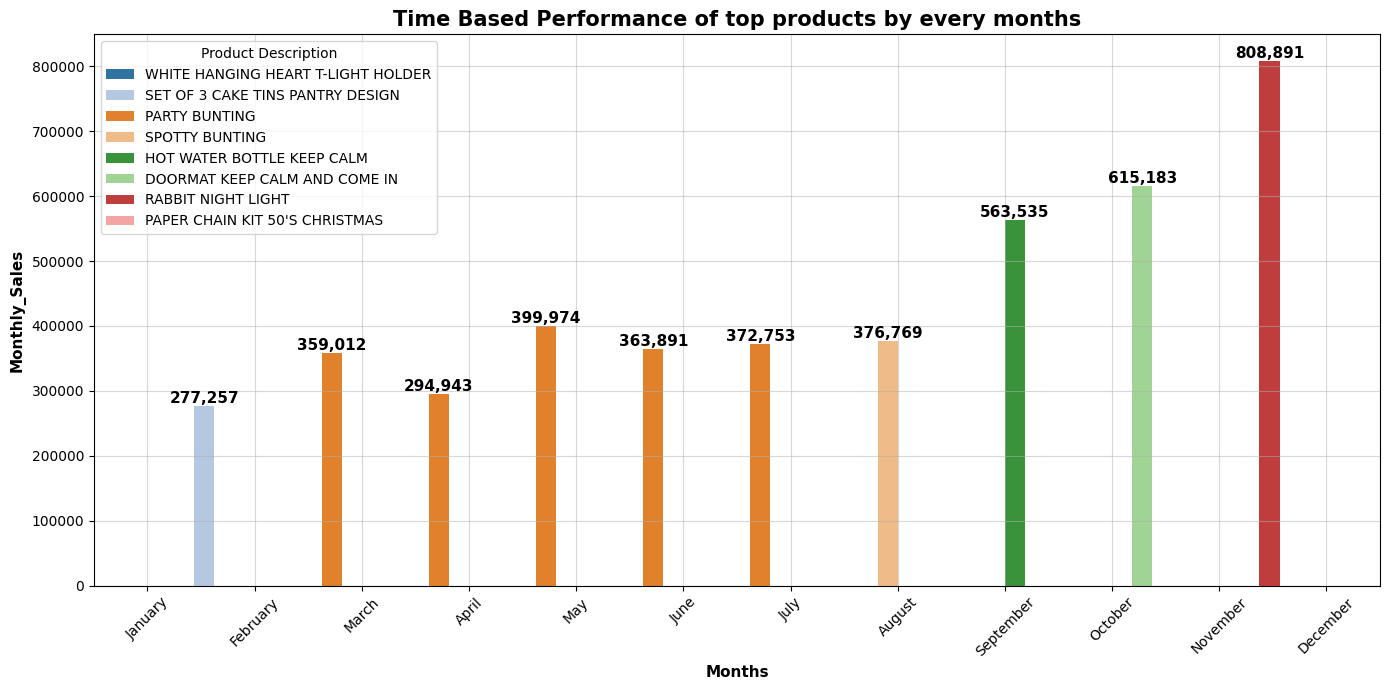

In [85]:
# Bar plot to show top 10 products by revenue:
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(x= "Months", y= "Monthly_Total_Sales",hue="Product_Description",
                       data = Time_Based_Performance, palette="tab20", width=1.5)
    
# Annotate each marker with value:
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha="center", va="bottom", fontsize=11, fontweight="bold")    

# Adding title, lable to our plot:
plt.title("Time Based Performance of top products by every months",fontsize=15,fontweight="bold")
plt.xlabel("Months", fontsize=11, fontweight="bold")
plt.ylabel("Monthly_Sales", fontsize=11, fontweight="bold")

plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(title="Product Description", fontsize=10)
plt.tight_layout()
plt.show()

**In above blocks *Time-Based Performance* was done where we know our top products by months
with a bar plot where it's shows top products by months and its sales.**

<a id="PPA_Task_4"></a>

##  Task:-4
**Profitability Analysis** 

In [86]:
# Copying E_Commerce_df data into a new variable:
E_Commerce_df_cost = E_Commerce_df_new.copy()

# Assuming CostPrice be 70% of "UnitPrice":
E_Commerce_df_cost["CostPrice"] = E_Commerce_df_cost["UnitPrice"] * 0.7  

E_Commerce_df_cost["Profit"] = (E_Commerce_df_cost["UnitPrice"] - E_Commerce_df_cost["CostPrice"]
                               ) * E_Commerce_df_cost["Quantity"]

E_Commerce_df_cost["Profit_Margin"] = (E_Commerce_df_cost["Profit"] / 
                                       E_Commerce_df_cost["Total_sales"])

# Printing out updated data:
print("Printing out few records from our dataset.")
display(E_Commerce_df_cost.head(5))

Printing out few records from our dataset.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Months,Total_sales,CostPrice,Profit,Profit_Margin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,December,15.30,1.785,4.590,0.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,December,20.34,2.373,6.102,0.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,December,22.00,1.925,6.600,0.3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,December,20.34,2.373,6.102,0.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,December,20.34,2.373,6.102,0.3


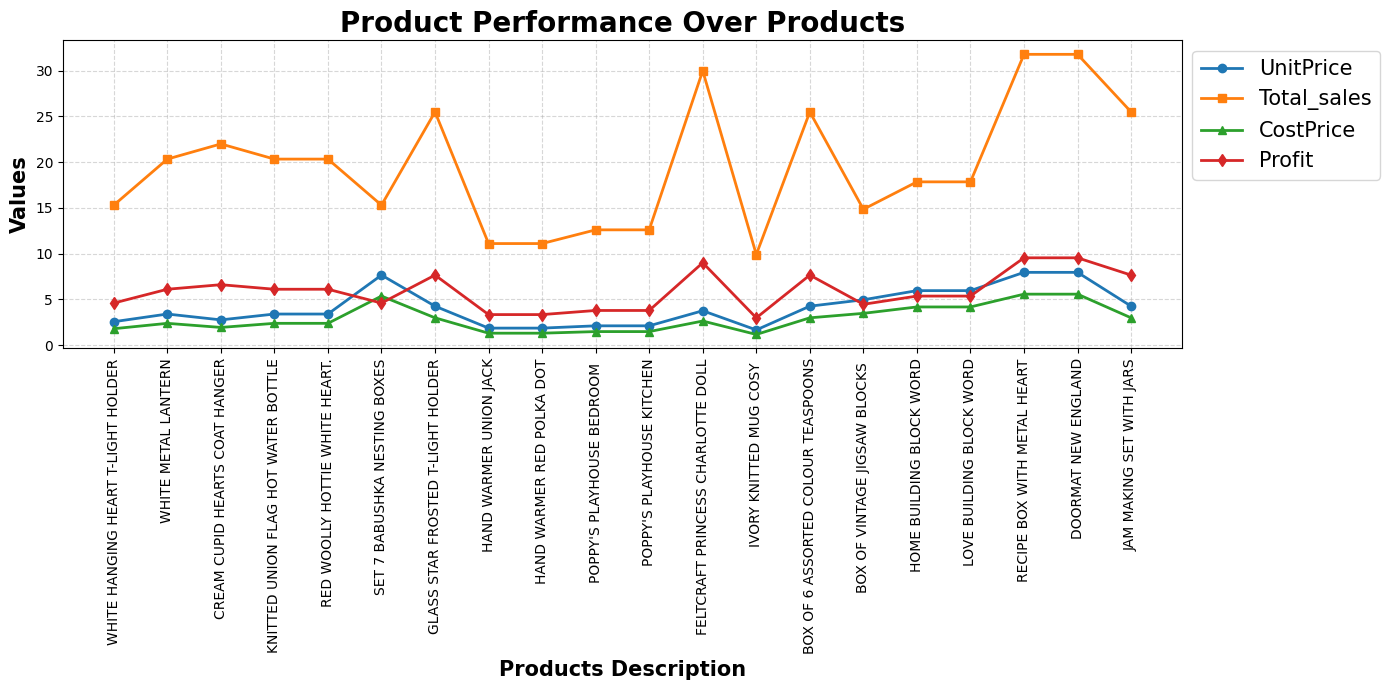

In [87]:
# Top 20 data to plot:
Top_20 = E_Commerce_df_cost.head(20)

# line plot to show top 20 "UnitPrice", "Total_sales", "CostPrice" & "Profit":
plt.figure(figsize=(14, 7))

# Plotting Unit Price:
plt.plot(Top_20["Description"], Top_20["UnitPrice"], marker="o", linewidth=2, label="UnitPrice")

# Plotting Total sales:
plt.plot(Top_20["Description"], Top_20["Total_sales"],marker="s", linewidth=2,label="Total_sales")

# Plotting Cost Price:
plt.plot(Top_20["Description"], Top_20["CostPrice"], marker="^", linewidth=2, label="CostPrice")

# Plotting Profit:
plt.plot(Top_20["Description"], Top_20["Profit"], marker="d", linewidth=2, label="Profit")

# Adding title, lable to our plot:
plt.title("Product Performance Over Products", fontsize=20, fontweight="bold")
plt.xlabel("Products Description", fontsize=15, fontweight="bold")
plt.ylabel("Values", fontsize=15, fontweight="bold")

# Adding grid & ticks to our plot:
plt.xticks(rotation=90)
plt.grid(linestyle="--", alpha=0.5)
plt.legend(fontsize=15,bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()  

## Top profitable products:

In [88]:
# Top 10 profitable products:
profit_product = (E_Commerce_df_cost.groupby("Description")[["Profit"]]
                  .sum().sort_values("Profit", ascending=False).reset_index().head(10))

# Printing out top products:
print("Printing out top 10 profitable products.")
display(profit_product)

Printing out top 10 profitable products.


,Description,Profit
0,WHITE HANGING HEART T-LIGHT HOLDER,10957.026
1,PARTY BUNTING,10951.131
2,JUMBO BAG RED RETROSPOT,9699.786
3,JAM MAKING SET WITH JARS,7483.569
4,ASSORTED COLOUR BIRD ORNAMENT,7451.433
5,SPOTTY BUNTING,7117.770
6,PAPER CHAIN KIT 50'S CHRISTMAS,6765.984
7,NATURAL SLATE HEART CHALKBOARD,6412.563
8,HOT WATER BOTTLE KEEP CALM,6380.013
9,DOORMAT KEEP CALM AND COME IN,6282.498


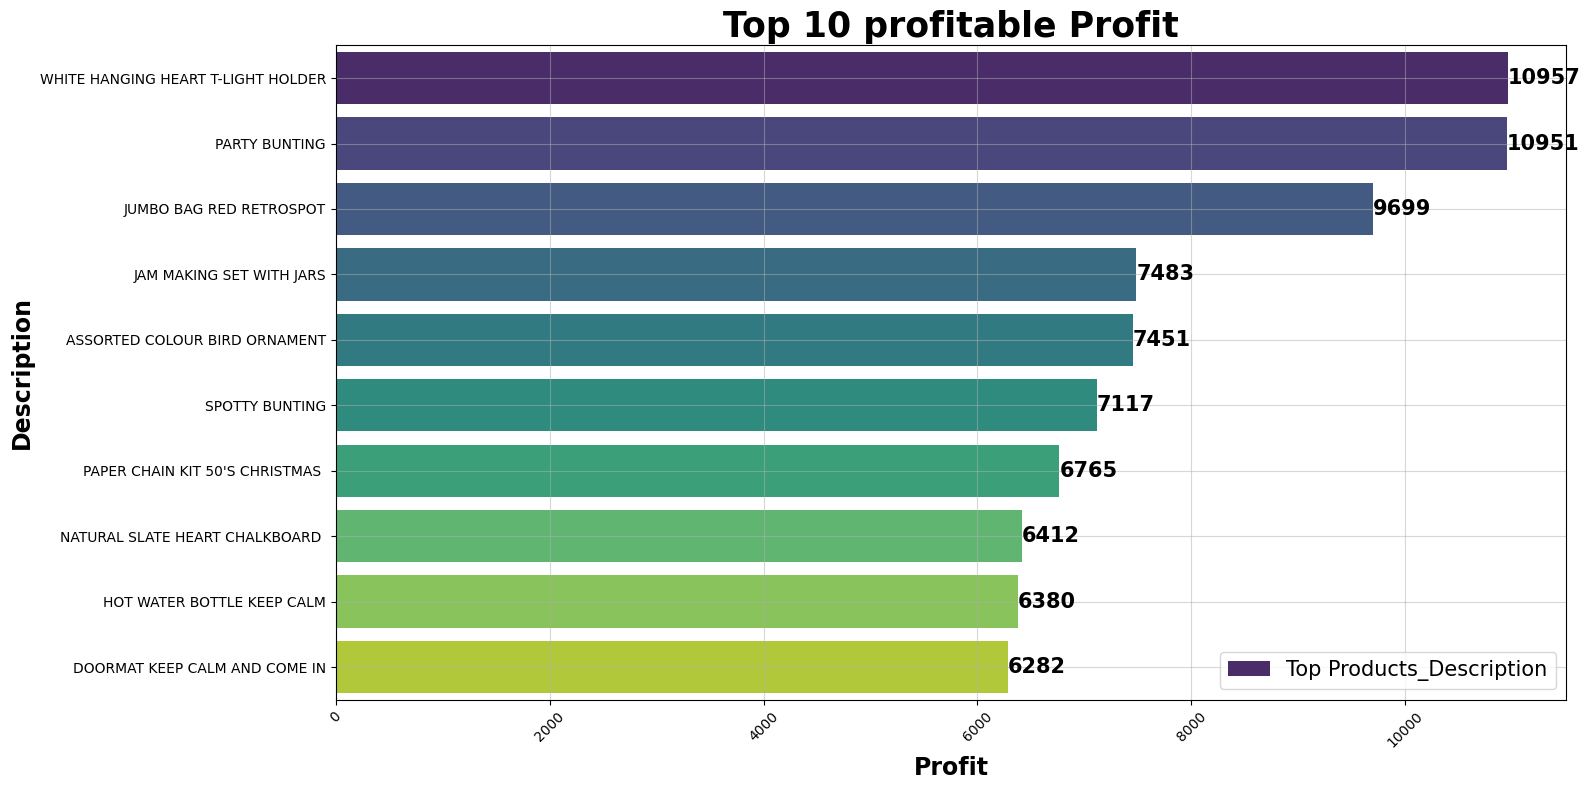

In [89]:
# Bar plot to show top 10 profitable products:
plt.figure(figsize=(16, 8))
Bar_plot = sns.barplot(x="Profit",y="Description",data=profit_product, palette="viridis",
                      label="Top Products_Description")

# Annotate each marker with value:
for p in Bar_plot.patches:
    Bar_plot.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha="left", va="center", fontsize=15, fontweight="bold")

# Adding title, lable to our plot:   
plt.title("Top 10 profitable Profit", fontsize=25, fontweight="bold")
plt.xlabel("Profit", fontsize=17, fontweight="bold")
plt.ylabel("Description", fontsize=17, fontweight="bold")

# Adding grid & ticks to our plot:
plt.grid(True, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## Profit margin per product.

In [90]:
# Profit Margin by products:
product_summary = E_Commerce_df_cost.groupby("Description").agg(
    Total_sales=("Total_sales","sum"),
    Profit=("Profit","sum"),
    Quantity=("Quantity","sum"),
    Profit_Margin=("Profit_Margin","sum")).reset_index().head(10)

# Printing out top products summary:
print("Printing out top 10 products summary.")
display(product_summary)

Printing out top 10 products summary.


,Description,Total_sales,Profit,Quantity,Profit_Margin
0,4 PURPLE FLOCK DINNER CANDLES,285.70,85.710,142,11.7
1,50'S CHRISTMAS GIFT BAG LARGE,1672.63,501.789,1311,36.9
2,DOLLY GIRL BEAKER,1314.25,394.275,1003,51.0
3,I LOVE LONDON MINI BACKPACK,1083.02,324.906,248,25.2
4,I LOVE LONDON MINI RUCKSACK,4.15,1.245,1,0.3
5,OVAL WALL MIRROR DIAMANTE,716.55,214.965,100,19.5
6,RED SPOT GIFT BAG LARGE,1513.92,454.176,1185,29.7
7,SET 2 TEA TOWELS I LOVE LONDON,3973.25,1191.975,1231,78.9
8,TRELLIS COAT RACK,822.30,246.690,170,14.1
9,10 COLOUR SPACEBOY PEN,3600.25,1080.075,4100,86.1


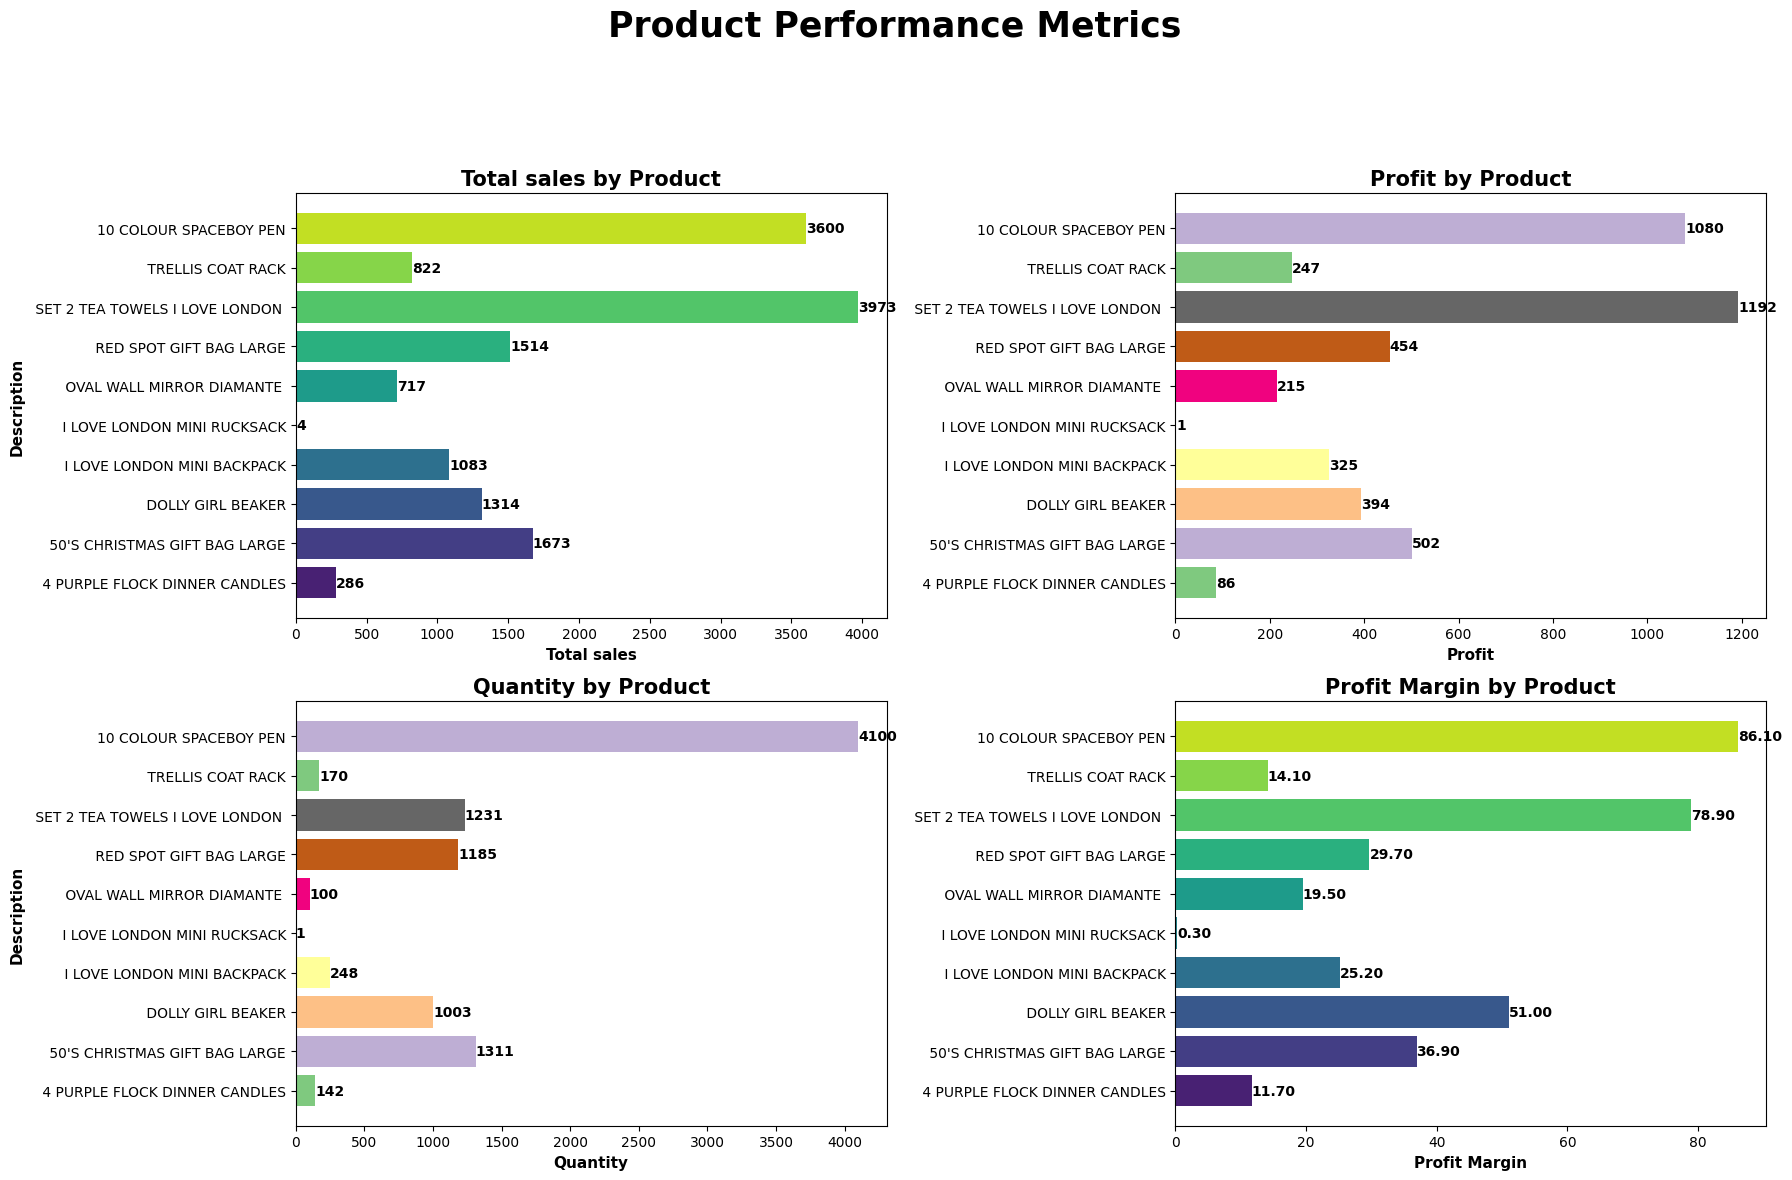

In [91]:
# Combined bar plot to show top 10 product summary in 2X2 grid format:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Choosing colour palettes for each bar:
colors1 = sns.color_palette("viridis", len(product_summary))
colors2 = sns.color_palette("Accent", len(product_summary))

# Bar plot:1- To show top 10 Total_sales:
bars1 = axes[0, 0].barh(product_summary["Description"], 
                        product_summary["Total_sales"], color=colors1)

axes[0, 0].bar_label(bars1, fmt="%.0f", fontsize=10, fontweight="bold")
axes[0, 0].set_title("Total sales by Product", fontsize=15, fontweight="bold")
axes[0, 0].set_xlabel("Total sales", fontsize=11, fontweight="bold")
axes[0, 0].set_ylabel("Description", fontsize=11, fontweight="bold")

# Bar plot:2- To show top 10 Profit:
bars2 = axes[0, 1].barh(product_summary["Description"],
                        product_summary["Profit"], color=colors2)

axes[0, 1].bar_label(bars2, fmt="%.0f", fontsize=10, fontweight="bold")
axes[0, 1].set_title("Profit by Product", fontsize=15, fontweight="bold")
axes[0, 1].set_xlabel("Profit", fontsize=11, fontweight="bold")


# Bar plot:3- To show top 10 Quantity:
bars3 = axes[1, 0].barh(product_summary["Description"],
                        product_summary["Quantity"], color=colors2)

axes[1, 0].bar_label(bars3, fmt="%.0f", fontsize=10, fontweight="bold")
axes[1, 0].set_title("Quantity by Product", fontsize=15, fontweight="bold")
axes[1, 0].set_xlabel("Quantity", fontsize=11, fontweight="bold")
axes[1, 0].set_ylabel("Description", fontsize=11, fontweight="bold")

# Bar plot:4- To show top 10 Profit_Margin:
bars4 = axes[1, 1].barh(product_summary["Description"],
                        product_summary["Profit_Margin"], color=colors1)

axes[1, 1].bar_label(bars4, fmt="%.2f", fontsize=10, fontweight="bold")
axes[1, 1].set_title("Profit Margin by Product", fontsize=15, fontweight="bold")
axes[1, 1].set_xlabel("Profit Margin", fontsize=11, fontweight="bold")


# Adding title & adjusting layout:
plt.suptitle("Product Performance Metrics", fontsize=25, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

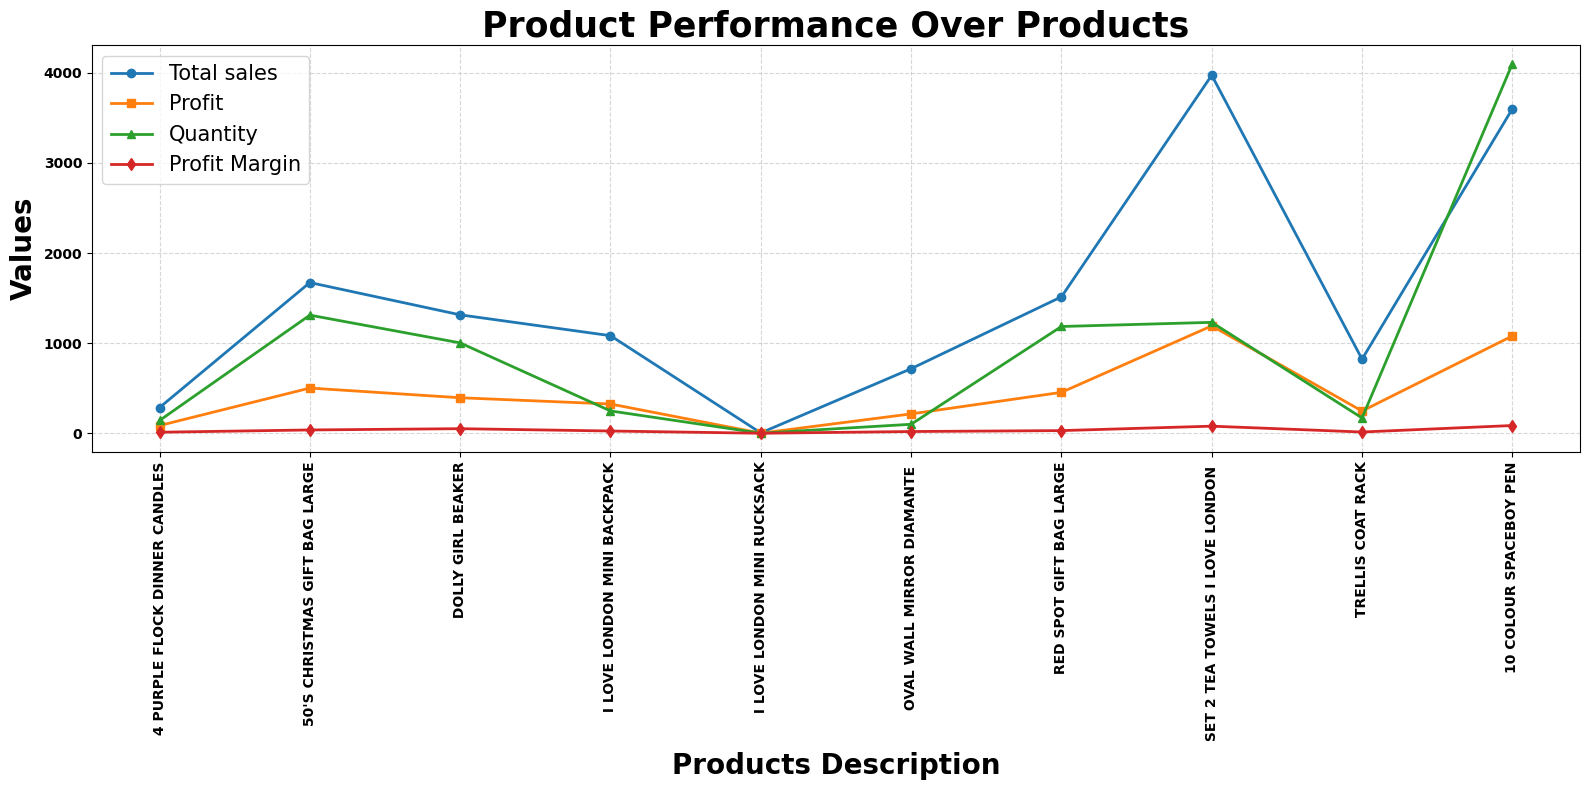

In [92]:
# Line plot to show top 10 product summary:
plt.figure(figsize=(16, 8))

# Line plot:1- To show top 10 Total_sales:
plt.plot(product_summary["Description"], product_summary["Total_sales"], 
         marker="o", linewidth=2, label="Total sales")

# Line plot:2- To show top 10 Profit:
plt.plot(product_summary["Description"], product_summary["Profit"], 
         marker="s", linewidth=2, label="Profit")

# Line plot:3- To show top 10 Quantity:
plt.plot(product_summary["Description"], product_summary["Quantity"], 
         marker="^", linewidth=2, label="Quantity")

# Line plot:4- To show top 10 Profit_Margin:
plt.plot(product_summary["Description"], product_summary["Profit_Margin"], 
         marker="d", linewidth=2, label="Profit Margin")

# Adding title, lable to our plot:
plt.title("Product Performance Over Products", fontsize=25, fontweight="bold")
plt.xlabel("Products Description", fontsize=20, fontweight="bold")
plt.ylabel("Values", fontsize=20, fontweight="bold")

# Adding grid & ticks to our plot:
plt.xticks(rotation=90, fontweight="bold")
plt.yticks(fontweight="bold")
plt.grid(linestyle="--", alpha=0.5)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

**In above blocks *Profitability Analysis* was done where we know "cost price" `(was not give in our data set but we assume it as 70% of "UnitPrice")`, "Top profitable products" & "Profit margin per product" for our better clarity there are line, bar and Combined bar plot:**

- **Plot-1:-**  Product Performance Over Products.
- **Plot-2:-**  Top 10 profitable Profit.
- **Plot-3:-**  Combined bar plot to show top 10 product summary.
- **Plot-4:-**  Line plot to show top 10 product summary.

<a id="Task:4"></a>
# 💠 4. Insights & Recommendations:

**Dataset Summery / Dataset report.**

# Online Retail Dataset – Analysis Report

## 1. Dataset Overview:

- **Title:** Online Retail Dataset (E-commerce Transactions)
- **Source:** Online Retail dataset (E-commerce transactions)
- **Domain:** E-commerce / Retail Analytics    
- **Time Period:** Dec 2010 – Dec 2011    
- **Shape:** `541,909 rows × 8 columns` (before cleaning)
- **Size:** `4,335,264` entries    

- **Columns:**
  - **InvoiceNo** – Unique transaction ID.
  - **StockCode** – Product code.
  - **Description** – Product description.
  - **Quantity** – Number of units purchased.
  - **InvoiceDate** – Date & time of purchase.
  - **UnitPrice** – Price per unit.
  - **CustomerID** – Unique customer identifier.
  - **Country** – Country of the transaction.

---

## 2. Data Overview & preparing for Preprocessing:

- Handled **Negative values** (Dropped negative values from `Quantity` & `UnitPrice` columns).
- **Negative values** are Linked with `InvoiceNo` prefixes:

  - **C** = Cancelled orders
  - **A** = Adjustments

Removed negative values, dataset reduced to `531,282 rows × 8 columns`.

---

## 3. Data Cleaning & Preprocessing *(EDA)*:

- Handled **missing values** (Handled records from `CustomerID` with `1,35,080` values of**24.93%** and `Description` with `1,454` values of **0.27%**).

- Removed **duplicates** (Dropped `5268` duplicate record after droping duplicates dataset reduced to `536,640 rows × 8 columns`).
    
- During **Univariate, Bivariate, Multivariate & Categorical Feature Analysis** what we observed that:
    
    - **Top Countries:** UK dominated sales, followed by Germany, France, EIRA & Netherlands.
    - **Monthly Sales Trend:** Clear seasonality, with peaks in **November & December** (Holiday season).
    - **Product Analysis:** Few products dominate revenue.
    - **Customer Behavior:** Concentrated in few regions, strong dependency on repeat purchases.
<br>
- Detected & handled **outliers**( In `Quantity` and `UnitPrice` columns contains outliersafter droping outliers values our dataset reduced to `461,180 rows × 8 columns`).

- Checking for **Correlation** we have found that `InvoiceNo` & `InvoiceDate` columns have **very strong positive correlation** And `InvoiceDate` & `CustomerID` columns have **weak positive correlation**

---

## 4. Feature Engineering:

- Added new feature as `Total_sales` (By multiplying `Quantity` and `UnitPrice` feature) 
<br>

- Extract some new feature as `Year & Months` from `InvoiceDate` feature.
<br>

- Added new feature as `CostPrice` (By assuming CostPrice = 70% of UnitPrice)
<br>

- Create new feature as `Profit & Profit Margin` (Profit is `UnitPrice` minus `CostPrice` multiply `Quantity` & Profit margin is `Profit` divided by `Total_sales`.)
<br>

- After creating new feature some plots are plotted  for better insights for our data.

---

## 5. Model building:
- **Time Series Forecasting**
    - Applied **RandomForestRegressor** for 2012 monthly sales prediction.
    - Forecast showed Increasing trend in early months, Strong peak in **holiday season** similar to 2011.

<br>

- **Product Performance Analysis:**
    - `Total Sales:` **5,398,658.42**
    - `Total Quantity Sold:` **2,849,847 units**  
    - `Unique Products:` **3,831**
    - Highest sales in **November & December**
    - Visualized **Sales, Profit, Quantity, Profit Margin with bar & line plots.

---

## 6. Key Insights

* **Seasonality:** Holiday season drives maximum sales.
* **Geography Concentration:** UK is the primary revenue driver.
* **Product Mix:** Small number of products generate majority of sales & profits.
* **Profit Margins:** Margins vary widely across products.

---

## 7. Recommendations

1. **Inventory Planning:** Stock up inventory before `Holiday season`.
2. **Geographic Expansion:** Focus on **non-UK markets** to diversify revenue streams.
3. **Product Strategy:** Focus on **high-margin products** and bundle with high-volume items.
4. **Customer Retention:** Loyalty programs, discounts for repeat buyers.
5. **Forecast Usage:** Use predictions to optimize **supply chain & staffing** during peak months.

---

**Conclusion:**  
The Online Retail dataset highlights strong seasonality, geographic concentration in the UK, and significant variation in product profitability. Optimizing product mix, expanding into new markets, and leveraging forecasts can improve sales and profitability.

# Exporting final dataframe into CSV format.

In [93]:
# Here we export our cleaned data into CSV:
E_Commerce_df_new.to_csv("E_Commerce_clear.csv", index=False)

In [94]:
# Here we export our cleaned data into CSV:
E_Commerce_df_cost.to_csv("E_Commerce_cost.csv", index=False)